(bass_example)=
# Introduction to the Bass Diffusion Model

## What is the Bass Model?

The Bass diffusion model, developed by Frank Bass in 1969, is a mathematical model that describes how new products get adopted in a population over time. It's widely used in marketing to forecast sales of new products, especially when historical data is limited or non-existent.

The model captures the entire lifecycle of product adoption, from introduction to saturation, making it a powerful tool for product planning and marketing strategy development.

## The Motivation Behind the Bass Model

Before the Bass model, companies struggled to predict the adoption patterns of new products. Traditional forecasting methods often failed because they couldn't account for the social dynamics that drive product adoption. Frank Bass recognized that product adoption follows a distinct pattern:

- **Initial slow growth**: When a product first launches, adoption starts slowly
- **Rapid acceleration**: As more people adopt, word-of-mouth spreads and adoption accelerates
- **Eventual saturation**: Eventually, the market becomes saturated and adoption slows down

The Bass model provides a mathematical framework to capture these patterns, enabling businesses to make more informed decisions about production planning, inventory management, and marketing resource allocation.

## Mathematical Formulation

The Bass model is based on a differential equation that describes the rate of adoption:

$$\frac{f(t)}{1-F(t)} = p + q F(t)$$

Where:

- $F(t)$ is the installed base fraction (cumulative proportion of adopters)
- $f(t)$ is the rate of change of the installed base fraction ($f(t) = F'(t)$)
- $p$ is the coefficient of innovation or external influence
- $q$ is the coefficient of imitation or internal influence

The solution to this equation gives the adoption curve:

$$F(t) = \frac{1 - e^{-(p+q)t}}{1 + (\frac{q}{p})e^{-(p+q)t}}$$

The adoption rate at time $t$ is given by:

$$f(t) = (p + q F(t))(1 - F(t))$$

Alternatively, this can be written as:

$$f(t) = \frac{(p+q)^2 \cdot e^{-(p+q)t}}{p \cdot (1+\frac{q}{p}e^{-(p+q)t})^2}$$

### Key Components of the Bass Model Implementation

The Bass model implementation in PyMC-Marketing consists of several key components:

1. **Adopters** - The number of new adoptions at time $t$:

$$\text{adopters}(t) = m \cdot f(p, q, t)$$

2. **Innovators** - Adoptions driven by external influence (advertising, etc.):

$$\text{innovators}(t) = m \cdot p \cdot (1 - F(p, q, t))$$

3. **Imitators** - Adoptions driven by internal influence (word-of-mouth):

$$\text{imitators}(t) = m \cdot q \cdot F(p, q, t) \cdot (1 - F(p, q, t))$$

4. **Peak Adoption Time** - When the adoption rate reaches its maximum:

$$\text{peak} = \frac{\ln(q) - \ln(p)}{p + q}$$

The total number of adopters over time is the sum of innovators and imitators, which equals $\text{adopters}(t)$. All of these components are directly implemented in the PyMC model, allowing us to analyze each aspect of the diffusion process separately.

### Understanding the Relationship Between Components

A key insight of the Bass model is how it decomposes adoption into two sources:

$$\text{adopters}(t) = \text{innovators}(t) + \text{imitators}(t)$$

At each time point:

- **Innovators** ($m \cdot p \cdot (1 - F(t))$) represents new adoptions coming from people who are influenced by external factors like advertising
- **Imitators** ($m \cdot q \cdot F(t) \cdot (1 - F(t))$) represents new adoptions coming from people who are influenced by previous adopters

As time progresses:

- Initially, **innovators** dominate the adoption process when few people have adopted ($F(t)$ is small)
- Later, **imitators** become the primary source of new adoptions as the word-of-mouth effect grows
- Eventually, both decrease as the market approaches saturation ($F(t)$ approaches 1)

The **cumulative adoption** at any time point is:

$$\text{Cumulative Adoption}(t) = m \cdot F(t)$$

This means that as $t \to \infty$, the cumulative adoption approaches the total market potential $m$:

$$\lim_{t \to \infty} \text{Cumulative Adoption}(t) = m$$

Therefore, the Bass model provides a complete accounting of the market:

- At each time point, new adopters are either innovators or imitators
- Over the entire product lifecycle, all potential adopters (m) eventually adopt the product
- The model tracks both the adoption rate (new adopters per time period) and the cumulative adoption (total adopters to date)

This structure enables marketers to understand not just how many people will adopt over time, but also the driving forces behind adoption at different stages of the product lifecycle.

## Understanding the Key Parameters

The model has three main parameters:

- **Market potential (m)**: Total number of eventual adopters (the ultimate market size)
- **Innovation coefficient (p)**: Measures external influence like advertising and media - typically $0.01-0.03$
- **Imitation coefficient (q)**: Measures internal influence like word-of-mouth - typically $0.3-0.5$

### Parameter Interpretation

- A higher **p** value indicates stronger external influence (advertising, marketing)
- A higher **q** value indicates stronger internal influence (word-of-mouth, social interactions)
- The ratio **q/p** indicates the relative strength of internal vs. external influences
- The peak of adoption occurs at time

$$t^* = \frac{\ln(q / p)}{p + q}$$

### Innovators vs. Imitators

The Bass model distinguishes between two types of adopters:

1. **Innovators**: People who adopt independently of others' decisions, influenced mainly by mass media and external communications
   - Mathematically represented as: $\text{innovators}(t) = m \cdot p \cdot (1 - F(p, q, t))$

2. **Imitators**: People who adopt because of social influence and word-of-mouth from previous adopters
   - Mathematically represented as: $\text{imitators}(t) = m \cdot q \cdot F(p, q, t) \cdot (1 - F(p, q, t))$

## Real-World Applications

The Bass model has been successfully applied to forecast the adoption of various products and technologies:

- **Consumer durables**: TVs, refrigerators, washing machines
- **Technology products**: Smartphones, computers, software
- **Pharmaceutical products**: New drugs and treatments
- **Entertainment products**: Movies, games, streaming services
- **Services and subscriptions**: Banking services, subscription plans

## Business Value: Why the Bass Model Matters to Executives and Marketers

From a business perspective, the Bass diffusion model provides substantial competitive advantages and ROI benefits:

### 1. Resource Optimization and Cash Flow Management

- **Production Planning**: Avoid costly overproduction or stockouts by accurately forecasting demand curves
- **Marketing Budget Allocation**: Optimize spending across the product lifecycle, investing more during key inflection points
- **Supply Chain Efficiency**: Coordinate with suppliers and distributors based on predicted adoption rates
- **Cash Flow Optimization**: Better predict revenue streams, improving financial planning and investor relations

### 2. Strategic Decision Making

- **Launch Timing**: Determine the optimal time to enter a market based on diffusion patterns
- **Pricing Strategy**: Implement dynamic pricing strategies aligned with the adoption curve
- **Competitive Analysis**: Compare your product's adoption parameters with competitors to identify strengths and weaknesses
- **Product Portfolio Management**: Make informed decisions about when to phase out older products and introduce new ones

### 3. Risk Mitigation

- **Scenario Planning**: Test different market assumptions and external factors through parameter variations
- **Early Warning System**: Identify deviations from expected adoption curves early, enabling faster intervention
- **Investment Justification**: Provide data-driven forecasts to justify R&D and marketing investments to stakeholders

### 4. Performance Measurement

- **Marketing Effectiveness**: Measure the impact of marketing campaigns on the innovation coefficient (p)
- **Word-of-Mouth Strength**: Quantify the power of your brand's social influence through the imitation coefficient (q)
- **Total Market Potential**: Validate or adjust your total addressable market estimates (m)

In today's data-driven business environment, companies that effectively utilize models like Bass diffusion gain a significant competitive edge through more precise forecasting, better resource allocation, and strategic market timing.

## Bayesian Extensions

In this notebook, we show how to generate simulated data from the Bass model and fit a Bayesian model to it. The Bayesian formulation  offers several advantages:

- **Uncertainty quantification** through prior distributions on parameters
- **Hierarchical modeling** for multiple products or markets
- **Incorporation of expert knowledge** through informative priors
- **Full probability distributions** for future adoption forecasts

## What we'll do in this notebook

In this notebook, we'll:
1. Set up parameters for a Bass model simulation
2. Generate simulated adoption data for multiple products
3. Fit the Bass model to our simulated data using PyMC
4. Visualize the adoption curves

## Prepare Notebook

In [1]:
from typing import Any

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pandas as pd
import pymc as pm
import xarray as xr

from pymc_marketing.bass.model import create_bass_model
from pymc_marketing.plot import plot_curve
from pymc_marketing.prior import Prior, Scaled

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

/Users/will/mamba/envs/pymc-marketing-dev/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
seed: int = sum(map(ord, "bass"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

## Setting Up Simulation Parameters

First, we'll set up the parameters for our simulation. This includes:

- The time period for our simulation (in weeks)
- The number of products to simulate
- Start dates for the simulation period

In [3]:
def setup_simulation_parameters(
    n_weeks: int = 52,
    n_products: int = 9,
    start_date: str = "2023-01-01",
    cutoff_start_date: str = "2023-12-01",
) -> tuple[
    npt.NDArray[np.int_],
    pd.DatetimeIndex,
    pd.DatetimeIndex,
    list[str],
    pd.Series,
    dict[str, Any],
]:
    """Set up initial parameters for the Bass diffusion model simulation.

    Parameters
    ----------
    n_weeks : int
        Number of weeks to simulate
    n_products : int
        Number of products to include in the simulation
    start_date : str
        Starting date for the simulation period
    cutoff_start_date : str
        Latest possible start date for products

    Returns
    -------
    T : numpy.ndarray
        Time array (weeks)
    possible_dates : pandas.DatetimeIndex
        All dates in the simulation period
    possible_start_dates : pandas.DatetimeIndex
        Possible start dates for products
    products : list
        List of product names
    product_start : pandas.Series
        Start date for each product
    coords : dict
        Coordinates for PyMC model
    """
    # Set a seed for reproducibility
    seed = sum(map(ord, "bass"))
    rng = np.random.default_rng(seed)

    # Create time array and date range
    T = np.arange(n_weeks)
    possible_dates = pd.date_range(start_date, freq="W-MON", periods=n_weeks)
    cutoff_start_date = pd.to_datetime(cutoff_start_date)
    cutoff_start_date = cutoff_start_date + pd.DateOffset(weeks=1)
    possible_start_dates = possible_dates[possible_dates < cutoff_start_date]

    # Generate product names and random start dates
    products = [f"P{i}" for i in range(n_products)]
    product_start = pd.Series(
        rng.choice(possible_start_dates, size=len(products)),
        index=pd.Index(products, name="product"),
    )

    coords = {"T": T, "product": products}
    return T, possible_dates, possible_start_dates, products, product_start, coords

## Creating Prior Distributions

For our Bayesian Bass model, we need to specify prior distributions for the key parameters:

- **m (market potential)**: How many units can potentially be sold in total
- **p (innovation coefficient)**: Rate of adoption from external influences
- **q (imitation coefficient)**: Rate of adoption from internal/social influences
- **likelihood**: The probability distribution that models the observed adoption data

For the market potential `m` we use a *scaling* trick to specify a scale-free prior and then add a global factor:

In [4]:
def create_bass_priors(factor: float) -> dict[str, Prior | Scaled]:
    """Define prior distributions for the Bass model parameters.

    Returns
    -------
    dict
        Dictionary of prior distributions for m, p, q, and likelihood

    Notes
    -----
    - m: Market potential (scaled Gamma distribution)
    - p: Innovation coefficient (Beta distribution)
    - q: Imitation coefficient (Beta distribution)
    - likelihood: Observation model (Negative Binomial)
    """
    return {
        # We use a scaled Gamma distribution for the market potential.
        "m": Scaled(Prior("Gamma", mu=1, sigma=0.1, dims="product"), factor=factor),
        "p": Prior("Beta", mu=0.03, dims="product").constrain(lower=0.01, upper=0.03),
        "q": Prior("Beta", dims="product").constrain(lower=0.3, upper=0.5),
        "likelihood": Prior(
            "NegativeBinomial",
            n=Prior("InverseGamma", alpha=8, beta=20),
            dims="product",
        ),
    }

Let's generate and visualize the priors.

In [5]:
FACTOR = 50_000
priors = create_bass_priors(factor=FACTOR)

/Users/will/mamba/envs/pymc-marketing-dev/lib/python3.11/site-packages/preliz/distributions/beta.py:124: RuntimeWarning: invalid value encountered in scalar divide
  mu = alpha / alpha_plus_beta
/Users/will/mamba/envs/pymc-marketing-dev/lib/python3.11/site-packages/preliz/distributions/beta.py:125: RuntimeWarning: invalid value encountered in scalar divide
  sigma = (alpha * beta) ** 0.5 / alpha_plus_beta / (alpha_plus_beta + 1) ** 0.5
/Users/will/github/pymc-eco/pymc-marketing/pymc_marketing/prior.py:929: UserWarning: 
The requested mass is 0.95,
but the computed one is 0.528
  new_parameters = maxent(


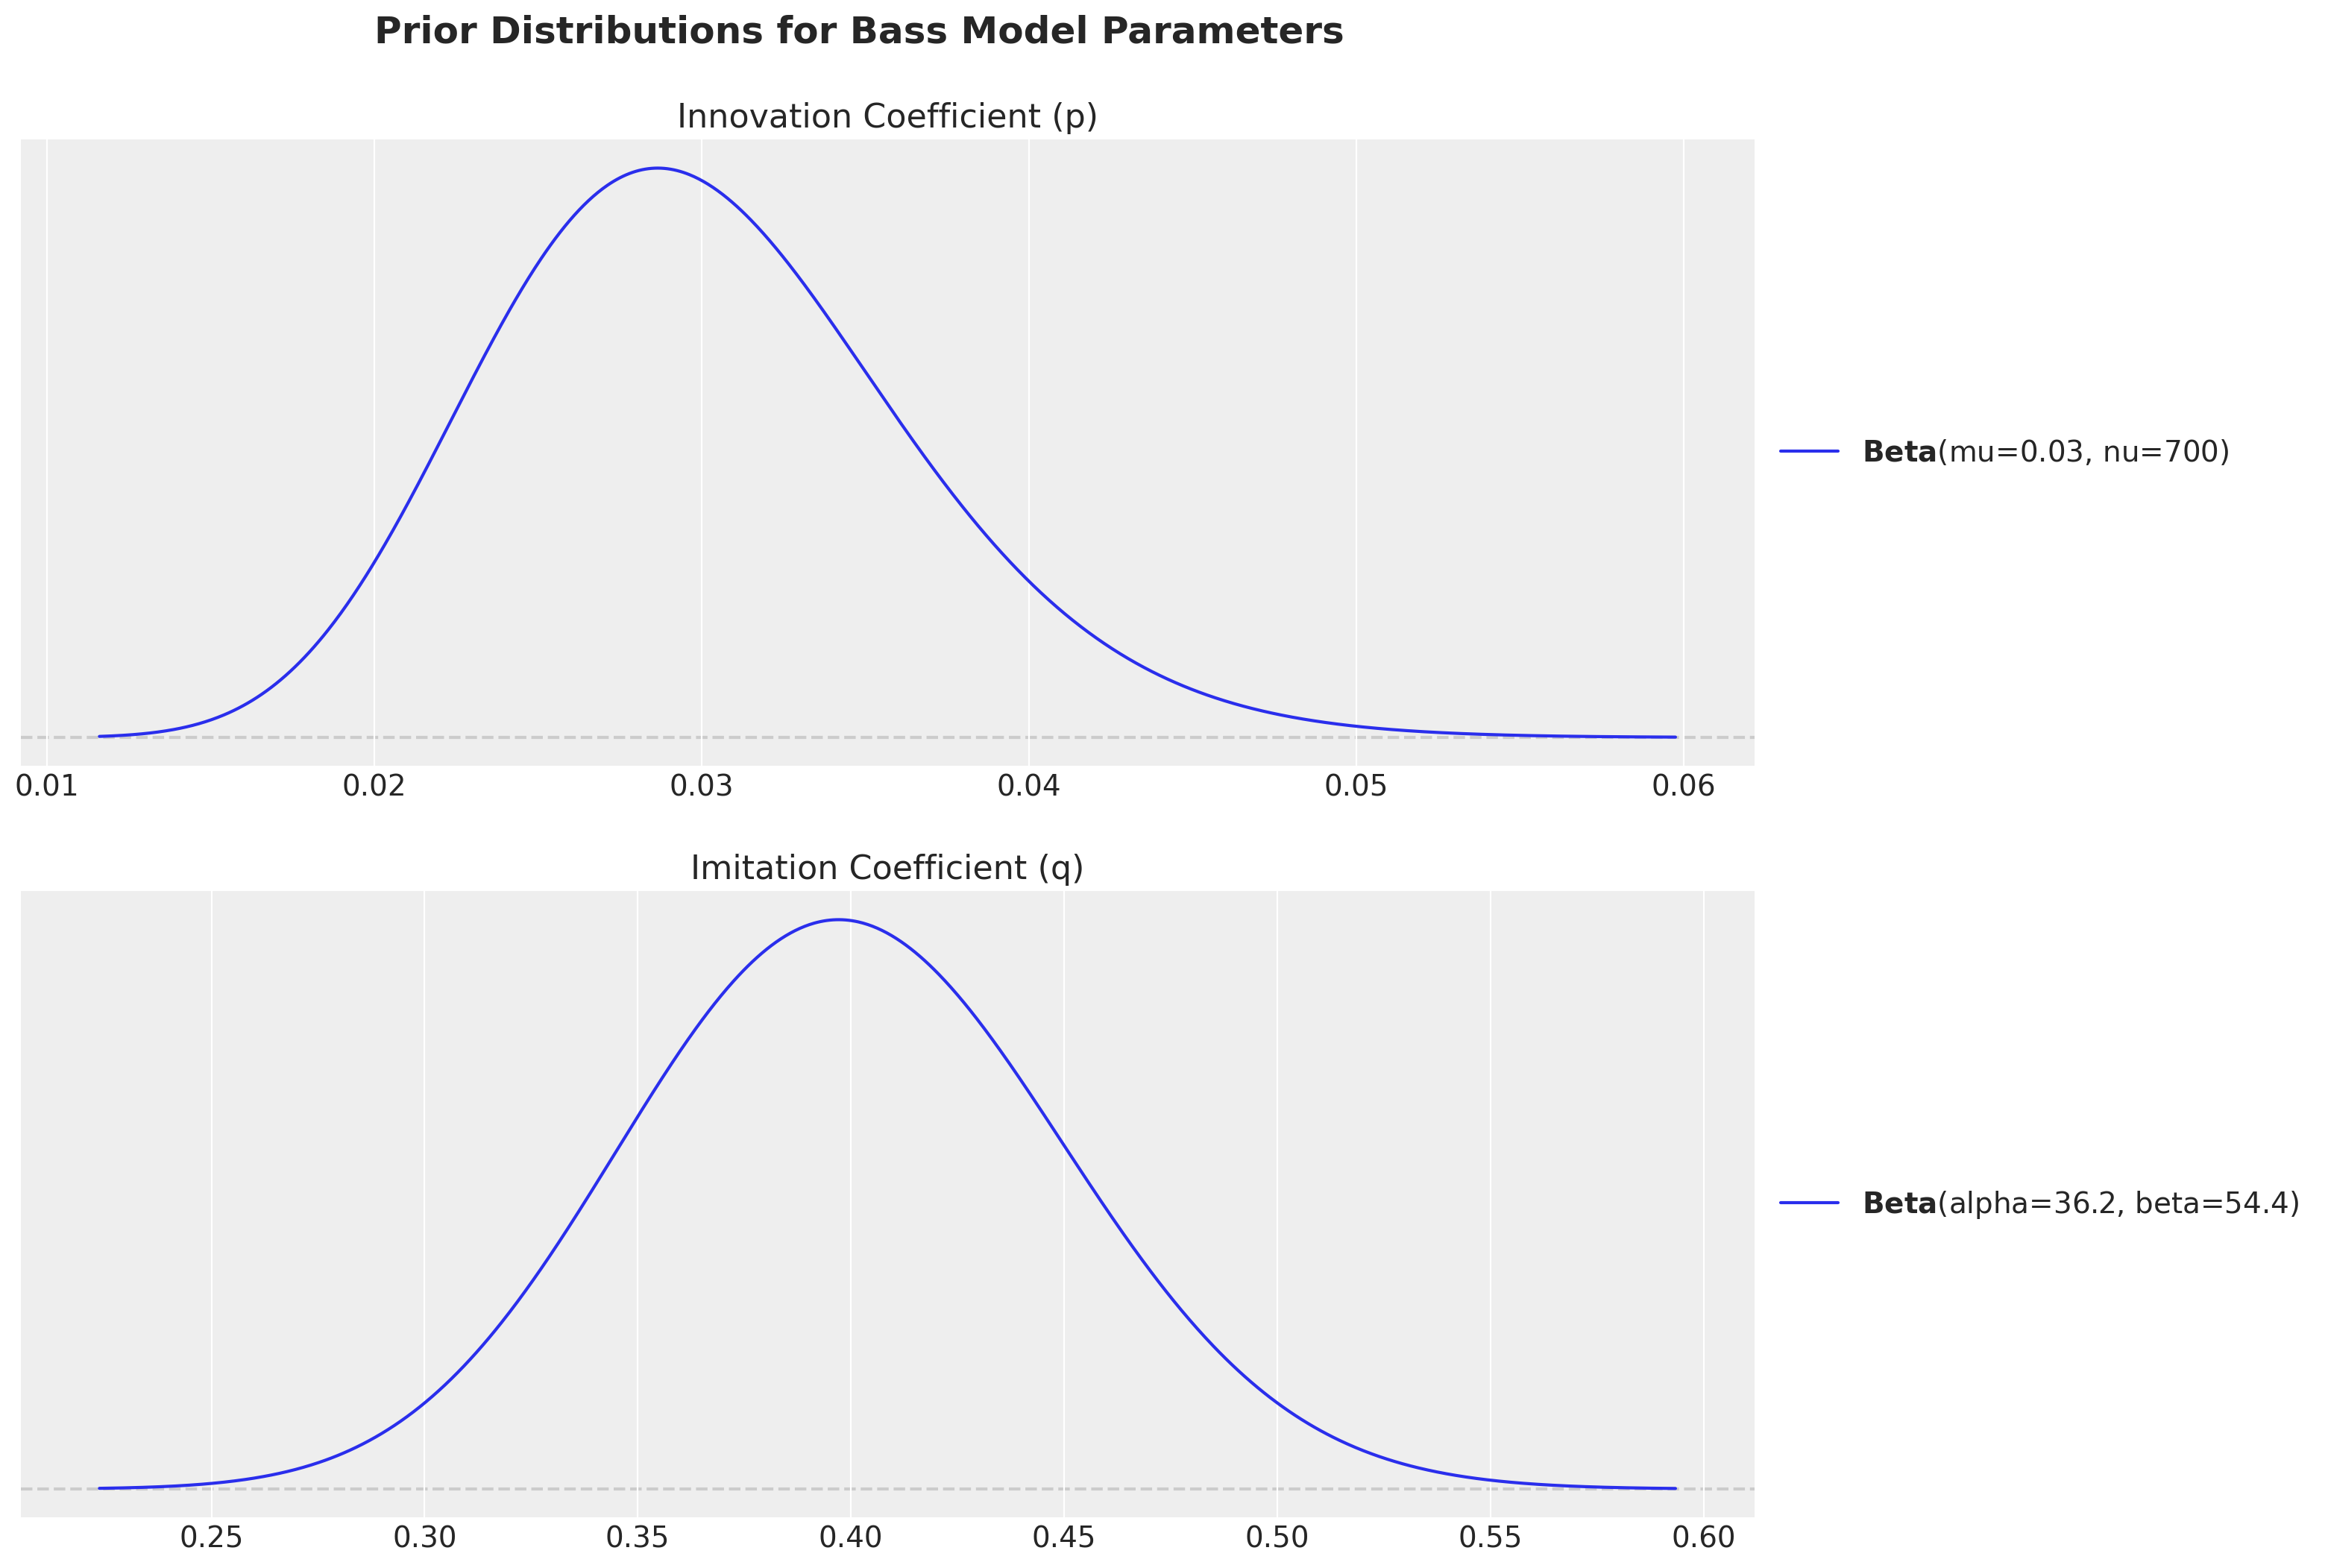

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

priors["p"].preliz.plot_pdf(ax=ax[0])
ax[0].set(title="Innovation Coefficient (p)")
priors["q"].preliz.plot_pdf(ax=ax[1])
ax[1].set(title="Imitation Coefficient (q)")
fig.suptitle(
    "Prior Distributions for Bass Model Parameters",
    fontsize=18,
    fontweight="bold",
    y=0.95,
);

Observe we have chosen the priors within the usual ranges of empirical studies:

- **Innovation coefficient (p)**: Measures external influence like advertising and media - typically $0.01-0.03$
- **Imitation coefficient (q)**: Measures internal influence like word-of-mouth - typically $0.3-0.5$

## Generate Synthetic Data

With the generative Bass model, we can generate a synthetic dataset by sampling from the prior and choosing one particular sample to use as *observed* data. For this purpose we define two auxiliary functions.

In [7]:
def sample_prior_bass_data(model: pm.Model) -> xr.DataArray:
    """Generate a sample from the prior predictive distribution of the Bass model.

    Parameters
    ----------
    model : pymc.Model
        The PyMC model to sample from

    Returns
    -------
    xarray.DataArray
        Simulated adoption data
    """
    with model:
        idata = pm.sample_prior_predictive(random_seed=rng)
    return idata["prior"]["y"].sel(chain=0, draw=0)


def transform_to_actual_dates(bass_data, product_start, possible_dates) -> pd.DataFrame:
    """Transform simulation data from time index to calendar dates.

    Parameters
    ----------
    bass_data : xarray.DataArray
        Simulated bass model data
    product_start : pandas.Series
        Start date for each product
    possible_dates : pandas.DatetimeIndex
        All dates in the simulation period

    Returns
    -------
    pandas.DataFrame
        Adoption data with actual calendar dates
    """
    bass_data = bass_data.to_dataset()
    bass_data["product_start"] = product_start.to_xarray()

    df_bass_data = (
        bass_data.to_dataframe().drop(columns=["chain", "draw"]).reset_index()
    )
    df_bass_data["actual_date"] = df_bass_data["product_start"] + pd.to_timedelta(
        7 * df_bass_data["T"], unit="days"
    )

    return (
        df_bass_data.set_index(["actual_date", "product"])
        .y.unstack(fill_value=0)
        .reindex(possible_dates, fill_value=0)
    )

Now we can generate the observed data:

In [8]:
# Setup simulation parameters
T, possible_dates, _, products, product_start, coords = setup_simulation_parameters()

# Create and configure the Bass model
generative_model = create_bass_model(t=T, coords=coords, observed=None, priors=priors)

# Sample and select one "observed" dataset.
bass_data = sample_prior_bass_data(generative_model)
actual_data = transform_to_actual_dates(bass_data, product_start, possible_dates)

Sampling: [m_unscaled, p, q, y, y_n]


The `actual_data` data frame has the typical format of a real dataset.

In [9]:
actual_data

product       P0     P1    P2     P3    P4    P5    P6    P7    P8
2023-01-02     0      0   797      0     0     0     0     0     0
2023-01-09     0      0  9902      0     0     0     0     0     0
2023-01-16     0      0  5468      0     0     0     0     0     0
2023-01-23     0      0  4941      0     0     0     0     0     0
2023-01-30     0   1281  9015      0     0  1397     0     0     0
2023-02-06     0   3439  3036      0     0  1856     0     0     0
2023-02-13     0   3901  5675      0     0  1908     0     0     0
2023-02-20     0   3235  8003      0     0  3636     0     0     0
2023-02-27     0   1618  3953   1462     0  8804     0     0     0
2023-03-06     0   2863  2269    921     0  2615     0     0     0
2023-03-13   761  14140  1000   2080     0  7206     0     0     0
2023-03-20  1738   5093  1318   1746     0  2122     0     0     0
2023-03-27  3923   5720  1101    666     0  9001     0     0     0
2023-04-03  2984   4892   259   3487     0  8587     0     0     0
2023-04-10  3715  10664   626   4902     0  1432     0     0     0
2023-04-17  3293   1241   170   3783     0   331     0     0     0
2023-04-24  5699   2082   251  12631     0  2839     0     0     0
2023-05-01  2452   1987   106   1654     0   894     0     0     0
2023-05-08  4322   1207    61   2982     0   583     0     0     0
2023-05-15  3375     46    11   1005     0  1750     0     0     0
2023-05-22  1344    174    10    796     0   174     0     0     0
2023-05-29  1322    195     9   1072     0   319     0     0     0
2023-06-05  1593    185    11    789     0   492     0     0     0
2023-06-12  2609    195     0    397     0   134     0     0     0
2023-06-19  1078     10     4    786     0     8     0     0     0
2023-06-26   626     16     1    177     0    62     0     0     0
2023-07-03   240     29     1    213     0    22     0     0     0
2023-07-10   136     16     0    101     0    97     0     0     0
2023-07-17   106     12     0     53     0     3     0     0     0
2023-07-24   150      3     1     48     0    13     0     0  1104
2023-07-31    37      6     0     14     0     7     0     0   773
2023-08-07    17      5     1      7     0     5     0     0  2788
2023-08-14    18      1     0      7     0     1     0     0  1550
2023-08-21     5      2     1     15     0     5     0     0  2083
2023-08-28     5      1     0      3     0     0     0     0  6172
2023-09-04    14      0     0      0     0     1     0   286  1638
2023-09-11     4      0     0      3     0     1  1259  1759  9292
2023-09-18     1      0     0      0     0     0  3048   153  3218
2023-09-25     1      0     0      0     0     1  5245  2837  2360
2023-10-02     0      0     0      0     0     0  3351  1574  2411
2023-10-09     0      0     0      1     0     0  4058  9728  1869
2023-10-16     3      0     0      0     0     0  4129  4594  4091
2023-10-23     0      0     0      0     0     0  2957  3812  1734
2023-10-30     0      0     0      0  1205     0  7700   755   432
2023-11-06     0      0     0      0   349     0  2875  1755   746
2023-11-13     0      0     0      0   802     0  3873   258    82
2023-11-20     0      0     0      0  1037     0  6791  2594   790
2023-11-27     0      0     0      0  3913     0  1119   870   328
2023-12-04     0      0     0      0  2865     0  1488  2182   356
2023-12-11     0      0     0      0  5758     0   517   434   179
2023-12-18     0      0     0      0  1080     0   392   956   100
2023-12-25     0      0     0      0  3338     0   383   684   103

On the other hand, the `bass_data` has the same data as arrays indexed by time (relative) and product.

Let's visualize both.

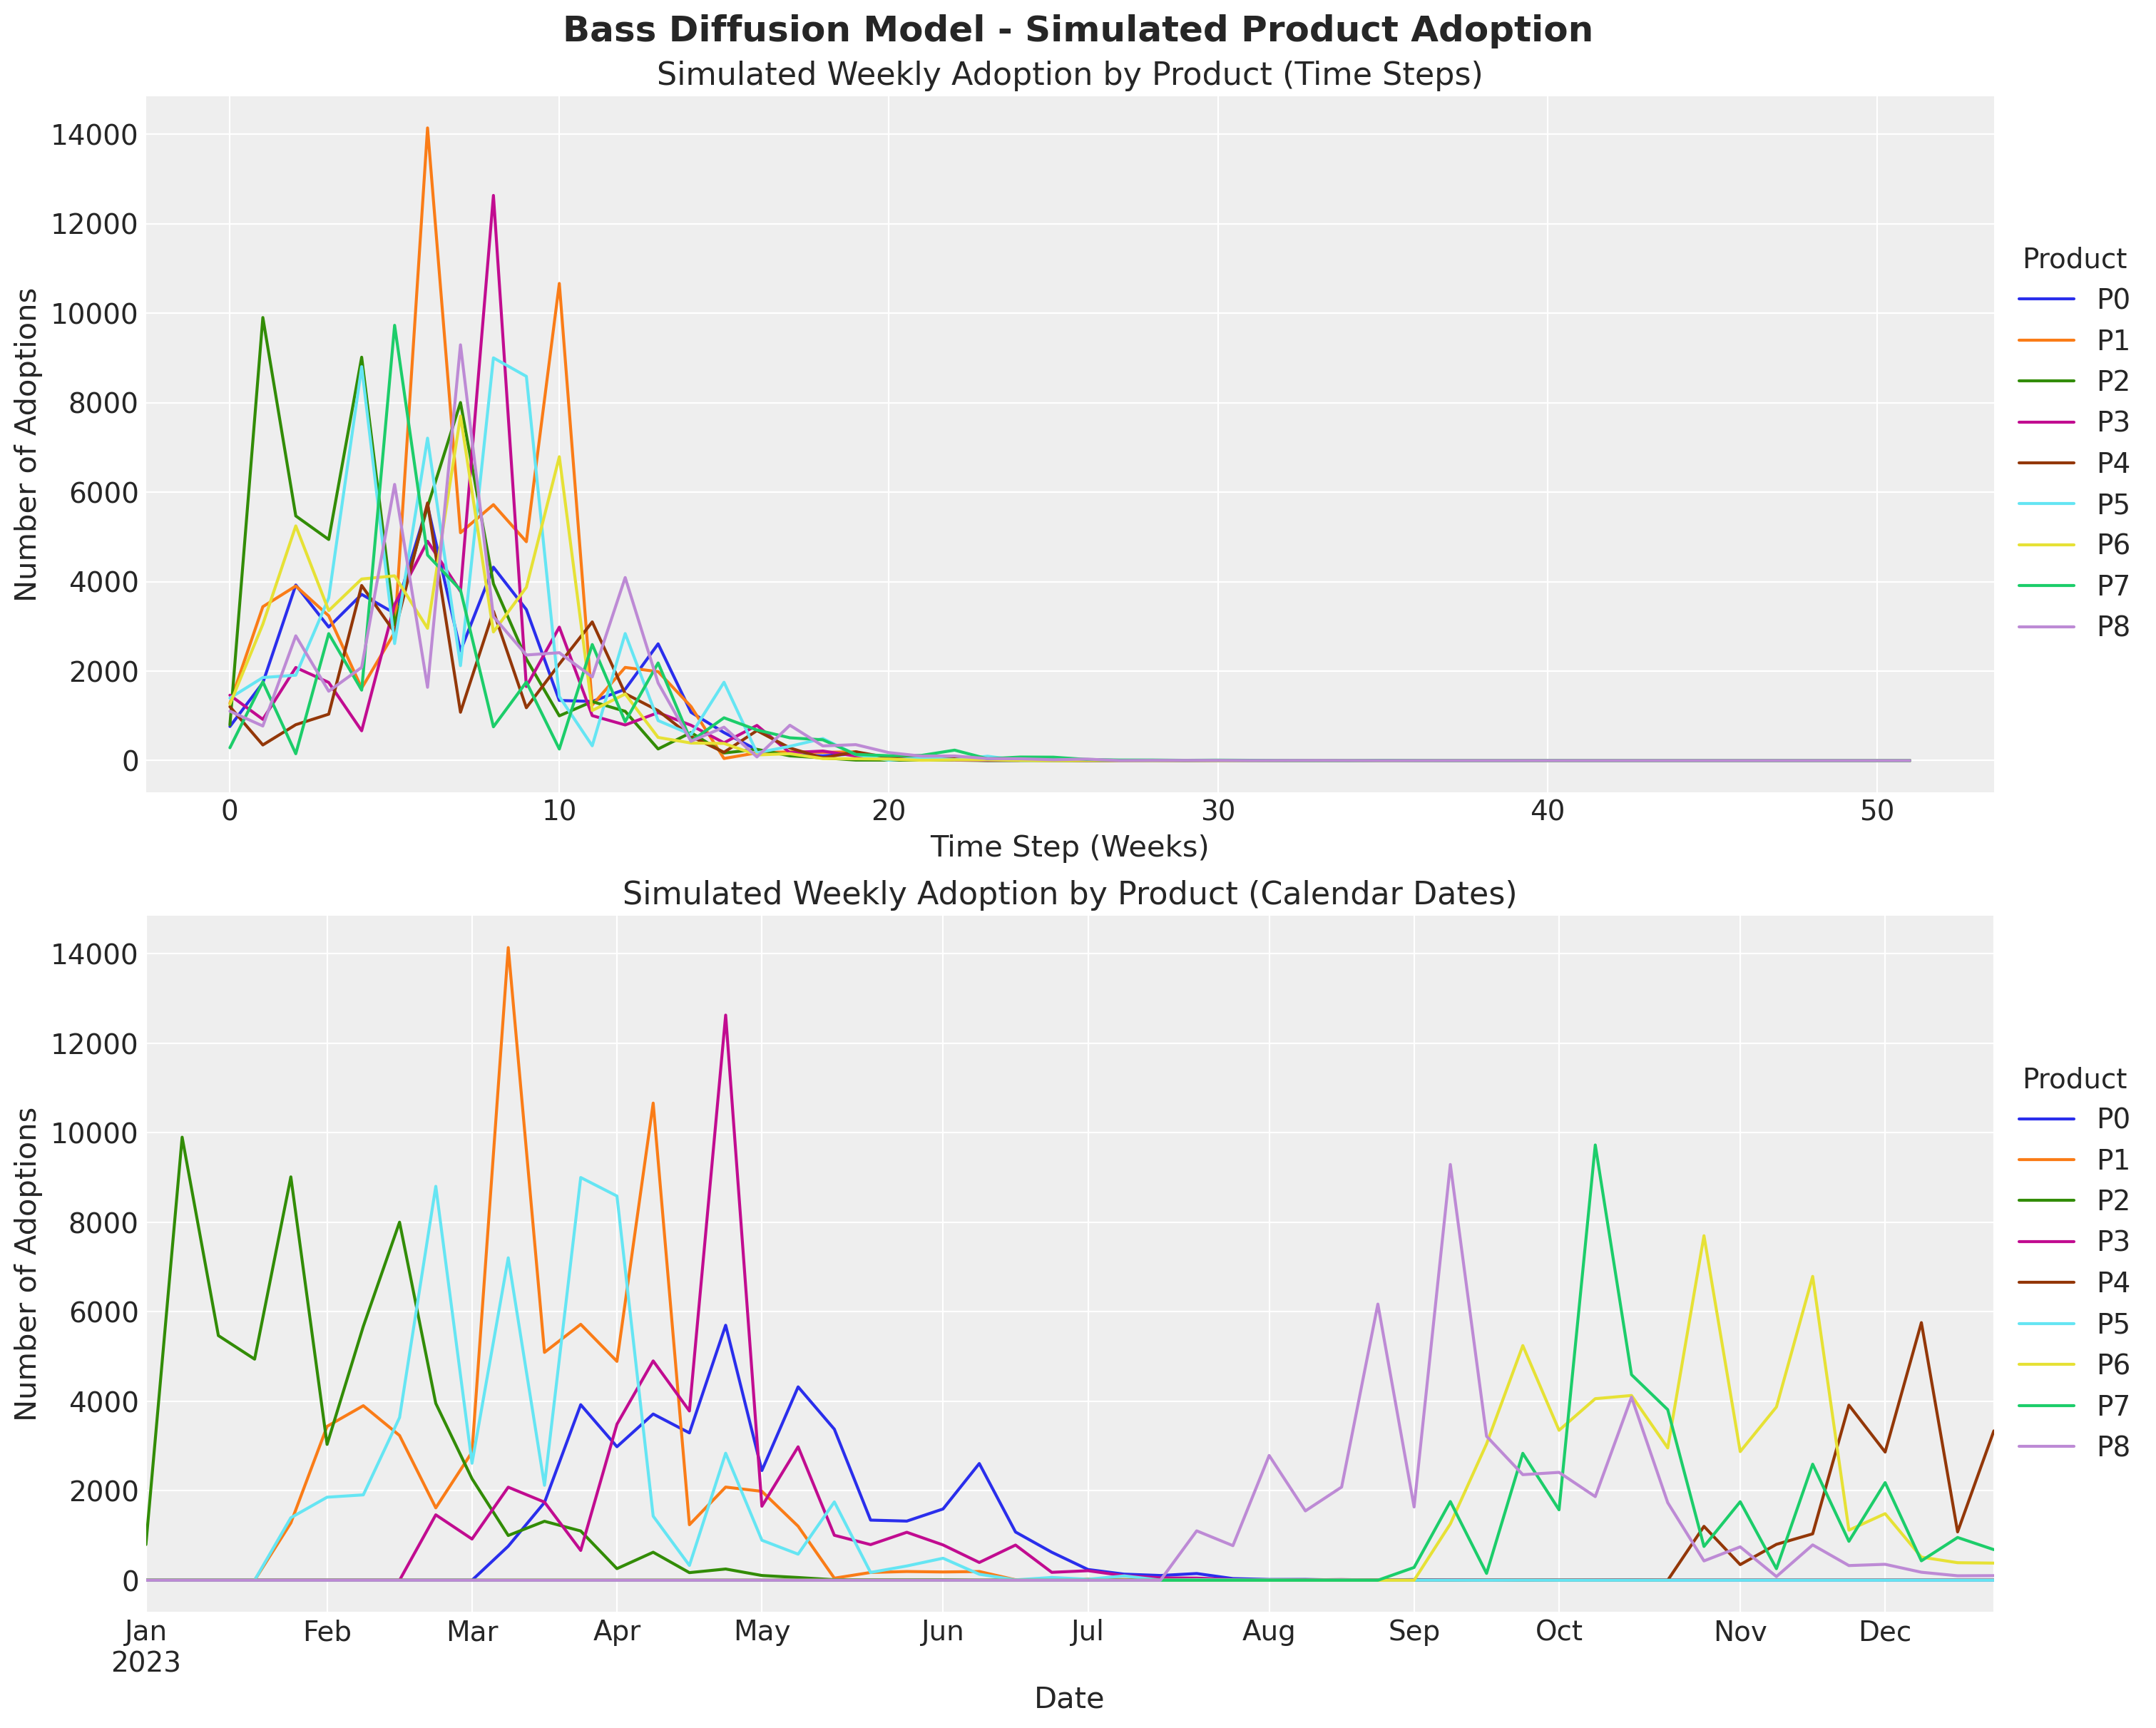

In [10]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(15, 12), sharex=False, sharey=True, layout="constrained"
)

# Plot raw simulated data (by time step)
bass_data.to_series().unstack().plot(ax=ax[0])
ax[0].legend(
    title="Product", title_fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5)
)
ax[0].set(
    title="Simulated Weekly Adoption by Product (Time Steps)",
    xlabel="Time Step (Weeks)",
    ylabel="Number of Adoptions",
)

# Plot data with actual calendar dates
actual_data.plot(ax=ax[1])
ax[1].legend(
    title="Product", title_fontsize=14, loc="center left", bbox_to_anchor=(1, 0.5)
)
ax[1].set(
    title="Simulated Weekly Adoption by Product (Calendar Dates)",
    xlabel="Date",
    ylabel="Number of Adoptions",
)

fig.suptitle(
    "Bass Diffusion Model - Simulated Product Adoption", fontsize=18, fontweight="bold"
);

## Fit the Model

We are now ready to fit the model and generate the posterior predictive distributions.

In [11]:
# We condition the model on observed data.
with pm.observe(generative_model, {"y": bass_data.values}) as model:
    idata = pm.sample(
        tune=1_500,
        draws=2_000,
        chains=4,
        nuts_sampler="nutpie",
        compile_kwargs={"mode": "NUMBA"},
        random_seed=rng,
    )

    idata.extend(
        pm.sample_posterior_predictive(
            idata, model=model, extend_inferencedata=True, random_seed=rng
        )
    )

Sampling: [y]


/Users/will/mamba/envs/pymc-marketing-dev/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

We do not have any divergences. Let's look at the summary of the parameters.

In [12]:
idata.posterior

<xarray.Dataset> Size: 95MB
Dimensions:                 (chain: 4, draw: 2000, m_unscaled_log___dim_0: 9,
                             p_logodds___dim_0: 9, q_logodds___dim_0: 9,
                             product: 9, T: 52)
Coordinates:
  * chain                   (chain) int64 32B 0 1 2 3
  * draw                    (draw) int64 16kB 0 1 2 3 4 ... 1996 1997 1998 1999
  * m_unscaled_log___dim_0  (m_unscaled_log___dim_0) int64 72B 0 1 2 3 4 5 6 7 8
  * p_logodds___dim_0       (p_logodds___dim_0) int64 72B 0 1 2 3 4 5 6 7 8
  * q_logodds___dim_0       (q_logodds___dim_0) int64 72B 0 1 2 3 4 5 6 7 8
  * product                 (product) object 72B 'P0' 'P1' 'P2' ... 'P7' 'P8'
  * T                       (T) int64 416B 0 1 2 3 4 5 6 ... 46 47 48 49 50 51
Data variables: (12/13)
    m_unscaled_log__        (chain, draw, m_unscaled_log___dim_0) float64 576kB ...
    p_logodds__             (chain, draw, p_logodds___dim_0) float64 576kB -3...
    q_logodds__             (chain, draw, q_logodds___dim_0) float64 576kB -0...
    y_n_log__               (chain, draw) float64 64kB 0.916 1.017 ... 0.8922
    m_unscaled              (chain, draw, product) float64 576kB 0.9674 ... 1...
    p                       (chain, draw, product) float64 576kB 0.029 ... 0....
    ...                      ...
    y_n                     (chain, draw) float64 64kB 2.499 2.765 ... 2.44
    m                       (chain, draw, product) float64 576kB 4.837e+04 .....
    adopters                (chain, draw, T, product) float64 30MB 1.403e+03 ...
    innovators              (chain, draw, T, product) float64 30MB 1.403e+03 ...
    imitators               (chain, draw, T, product) float64 30MB 0.0 ... 0....
    peak                    (chain, draw, product) float64 576kB 6.132 ... 7.144
Attributes:
    created_at:                 2025-07-24T18:04:20.730594+00:00
    arviz_version:              0.21.0
    inference_library:          nutpie
    inference_library_version:  0.15.1
    sampling_time:              3.9689738750457764
    tuning_steps:               1500

In [13]:
az.summary(data=idata, var_names=["p", "q", "m", "y_n"])

mean        sd     hdi_3%    hdi_97%  mcse_mean  mcse_sd  \
p[P0]      0.028     0.005      0.019      0.037      0.000    0.000   
p[P1]      0.027     0.004      0.019      0.035      0.000    0.000   
p[P2]      0.039     0.006      0.029      0.050      0.000    0.000   
p[P3]      0.026     0.005      0.017      0.034      0.000    0.000   
p[P4]      0.027     0.005      0.018      0.036      0.000    0.000   
p[P5]      0.027     0.005      0.019      0.036      0.000    0.000   
p[P6]      0.031     0.005      0.022      0.041      0.000    0.000   
p[P7]      0.027     0.005      0.019      0.037      0.000    0.000   
p[P8]      0.025     0.004      0.017      0.033      0.000    0.000   
q[P0]      0.409     0.018      0.374      0.443      0.000    0.000   
q[P1]      0.410     0.017      0.379      0.443      0.000    0.000   
q[P2]      0.441     0.019      0.404      0.476      0.000    0.000   
q[P3]      0.411     0.018      0.376      0.446      0.000    0.000   
q[P4]      0.371     0.017      0.336      0.401      0.000    0.000   
q[P5]      0.377     0.017      0.346      0.408      0.000    0.000   
q[P6]      0.433     0.019      0.398      0.468      0.000    0.000   
q[P7]      0.318     0.015      0.290      0.347      0.000    0.000   
q[P8]      0.352     0.016      0.322      0.382      0.000    0.000   
m[P0]  48556.666  4129.629  40771.362  56211.078     36.046   50.583   
m[P1]  53546.238  4234.743  45501.402  61293.719     37.407   55.199   
m[P2]  51913.351  4321.060  44099.071  60142.530     38.732   52.322   
m[P3]  47886.923  4296.611  39686.264  55695.049     36.339   54.168   
m[P4]  44249.734  4084.189  36633.565  51873.099     35.007   54.048   
m[P5]  52106.801  4188.603  44024.189  59633.874     37.839   50.806   
m[P6]  50151.135  4340.068  41981.008  58256.426     36.599   55.887   
m[P7]  46240.943  4131.518  38276.280  53690.682     34.373   53.147   
m[P8]  48936.249  4105.054  41167.827  56687.960     35.481   50.344   
y_n        2.593     0.224      2.180      3.028      0.002    0.003   

       ess_bulk  ess_tail  r_hat  
p[P0]   11763.0    6085.0    1.0  
p[P1]   12486.0    5589.0    1.0  
p[P2]   12658.0    6225.0    1.0  
p[P3]   11811.0    6400.0    1.0  
p[P4]   11724.0    5613.0    1.0  
p[P5]   10657.0    5906.0    1.0  
p[P6]   12747.0    6105.0    1.0  
p[P7]   10512.0    6201.0    1.0  
p[P8]   10473.0    6146.0    1.0  
q[P0]   12644.0    6048.0    1.0  
q[P1]   13197.0    5887.0    1.0  
q[P2]   13067.0    6615.0    1.0  
q[P3]   12509.0    5858.0    1.0  
q[P4]   11284.0    6026.0    1.0  
q[P5]   10929.0    5561.0    1.0  
q[P6]   12212.0    6178.0    1.0  
q[P7]   10307.0    6402.0    1.0  
q[P8]   10306.0    6106.0    1.0  
m[P0]   13278.0    5763.0    1.0  
m[P1]   12877.0    5654.0    1.0  
m[P2]   12483.0    6086.0    1.0  
m[P3]   14500.0    5468.0    1.0  
m[P4]   13747.0    5440.0    1.0  
m[P5]   12634.0    5463.0    1.0  
m[P6]   14219.0    6010.0    1.0  
m[P7]   14403.0    6077.0    1.0  
m[P8]   13442.0    5903.0    1.0  
y_n     10784.0    6250.0    1.0

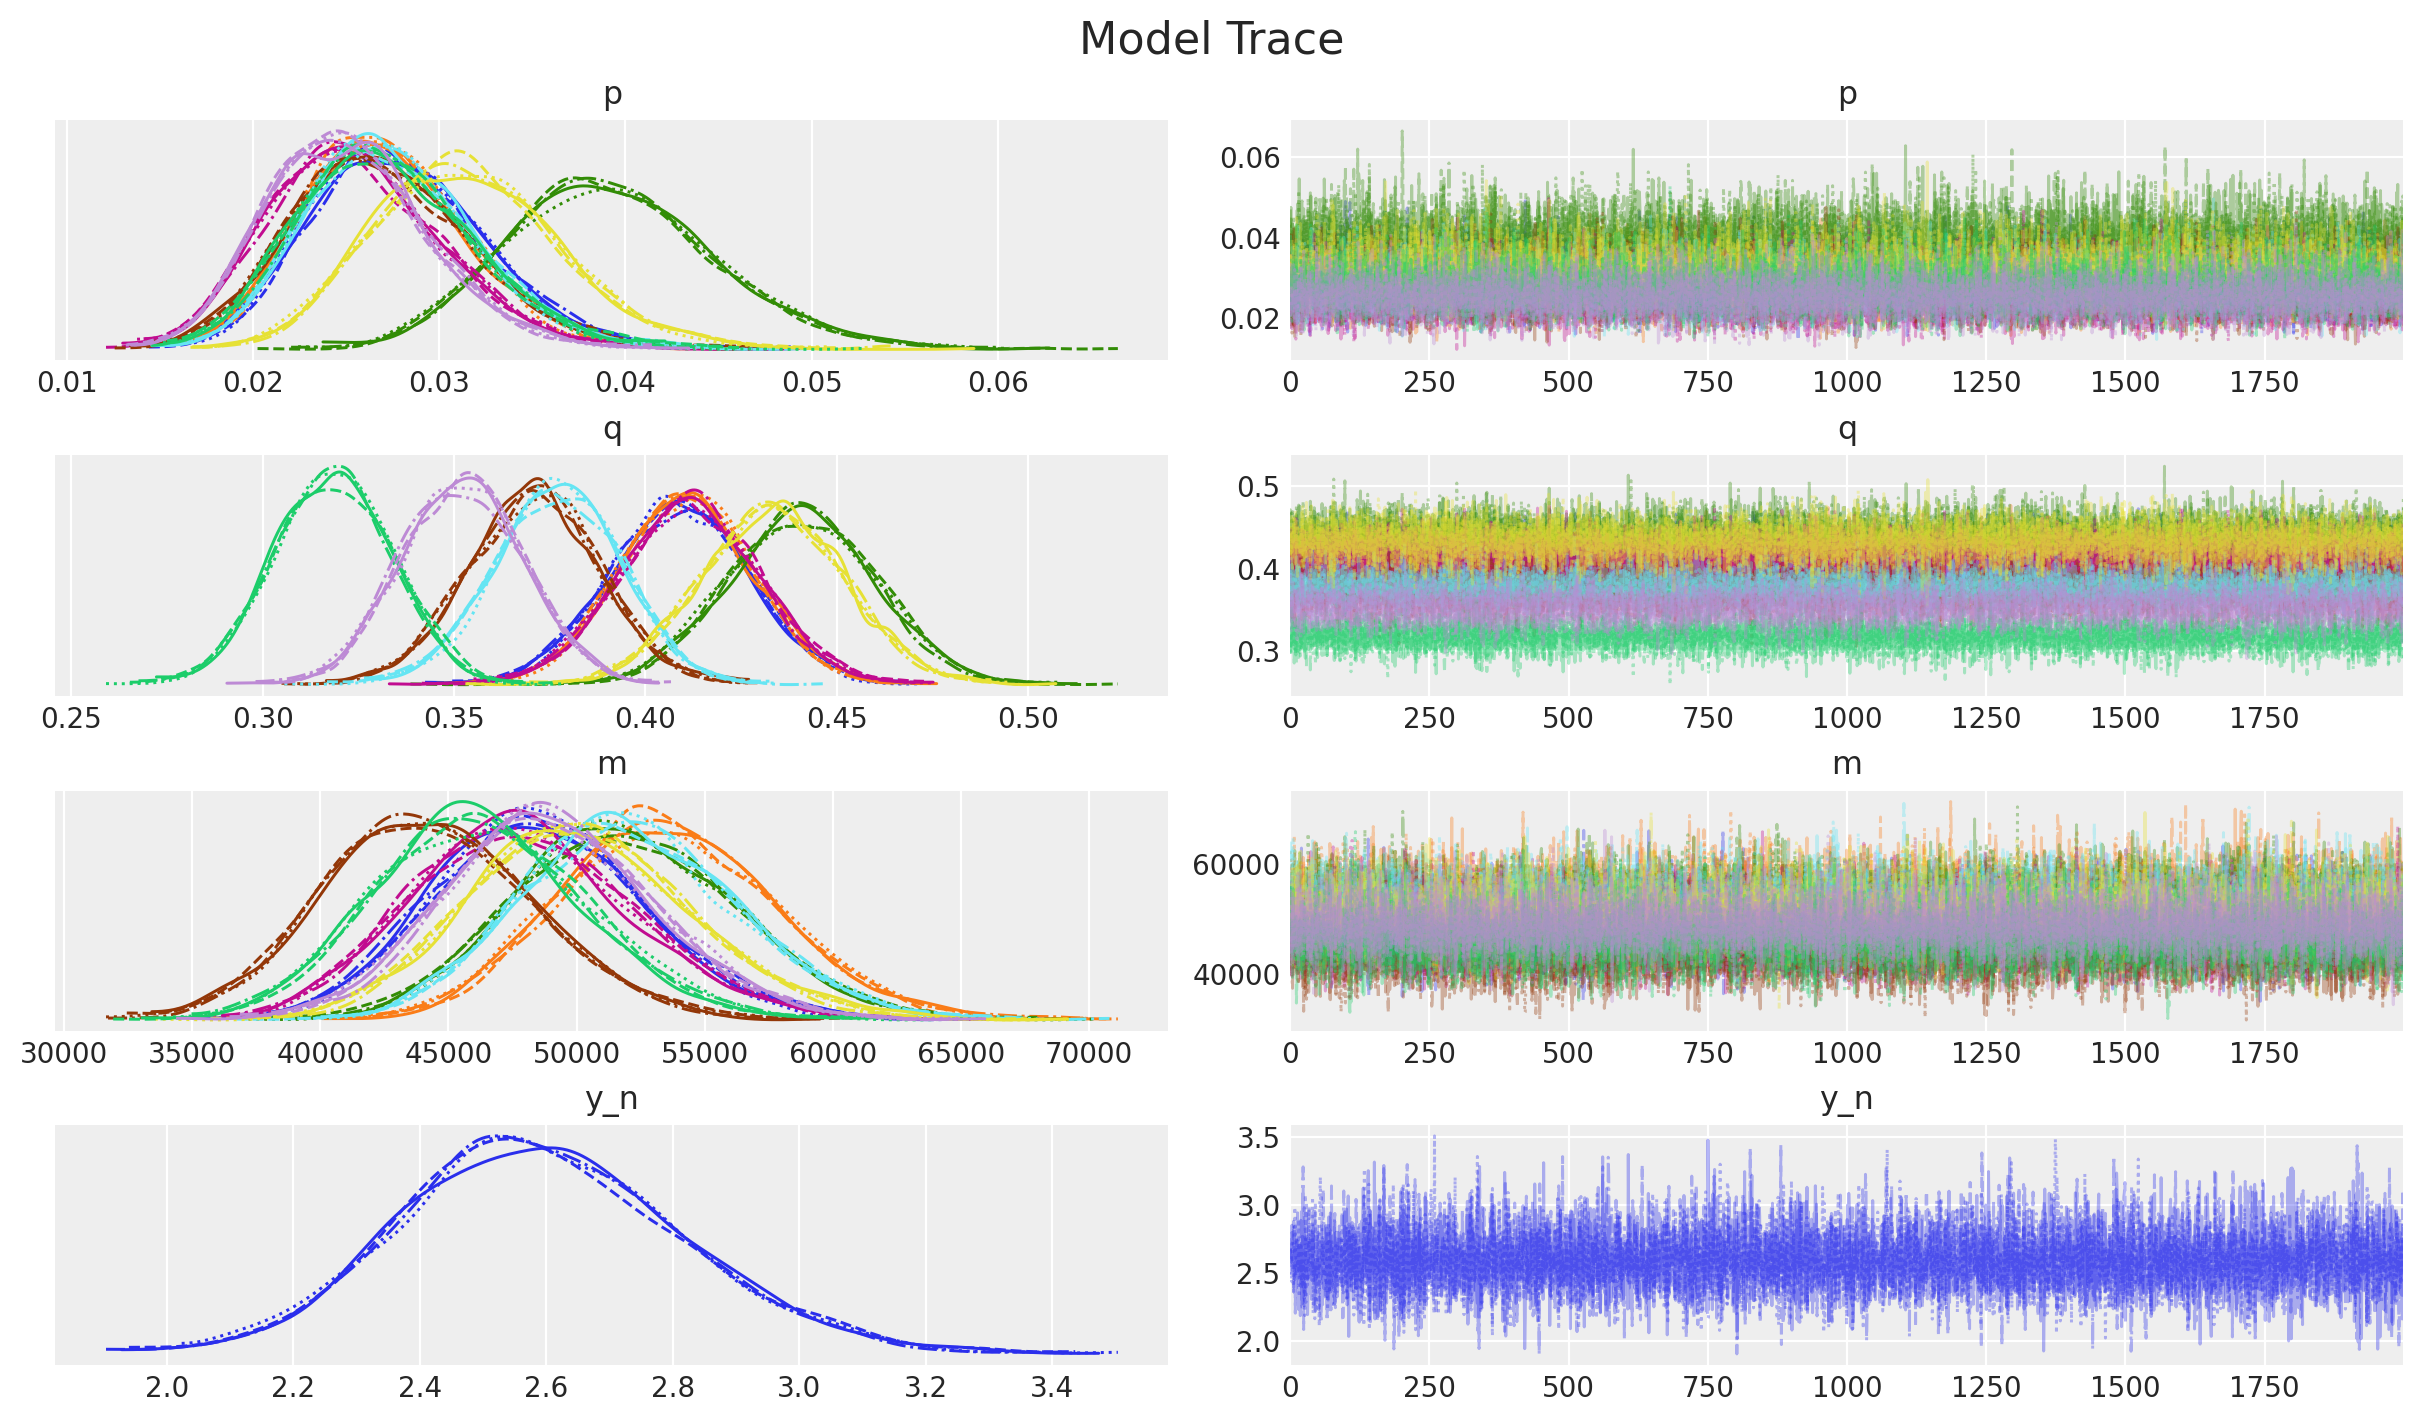

In [14]:
_ = az.plot_trace(
    data=idata,
    var_names=["p", "q", "m", "y_n"],
    compact=True,
    backend_kwargs={"figsize": (12, 7), "layout": "constrained"},
)
plt.gcf().suptitle("Model Trace", fontsize=16);

Overall, the diagnostics and trace look good.

Next, we look into the posterior distributions of the parameters.

Text(0.5, 0.98, 'Innovation Coefficient (p)')

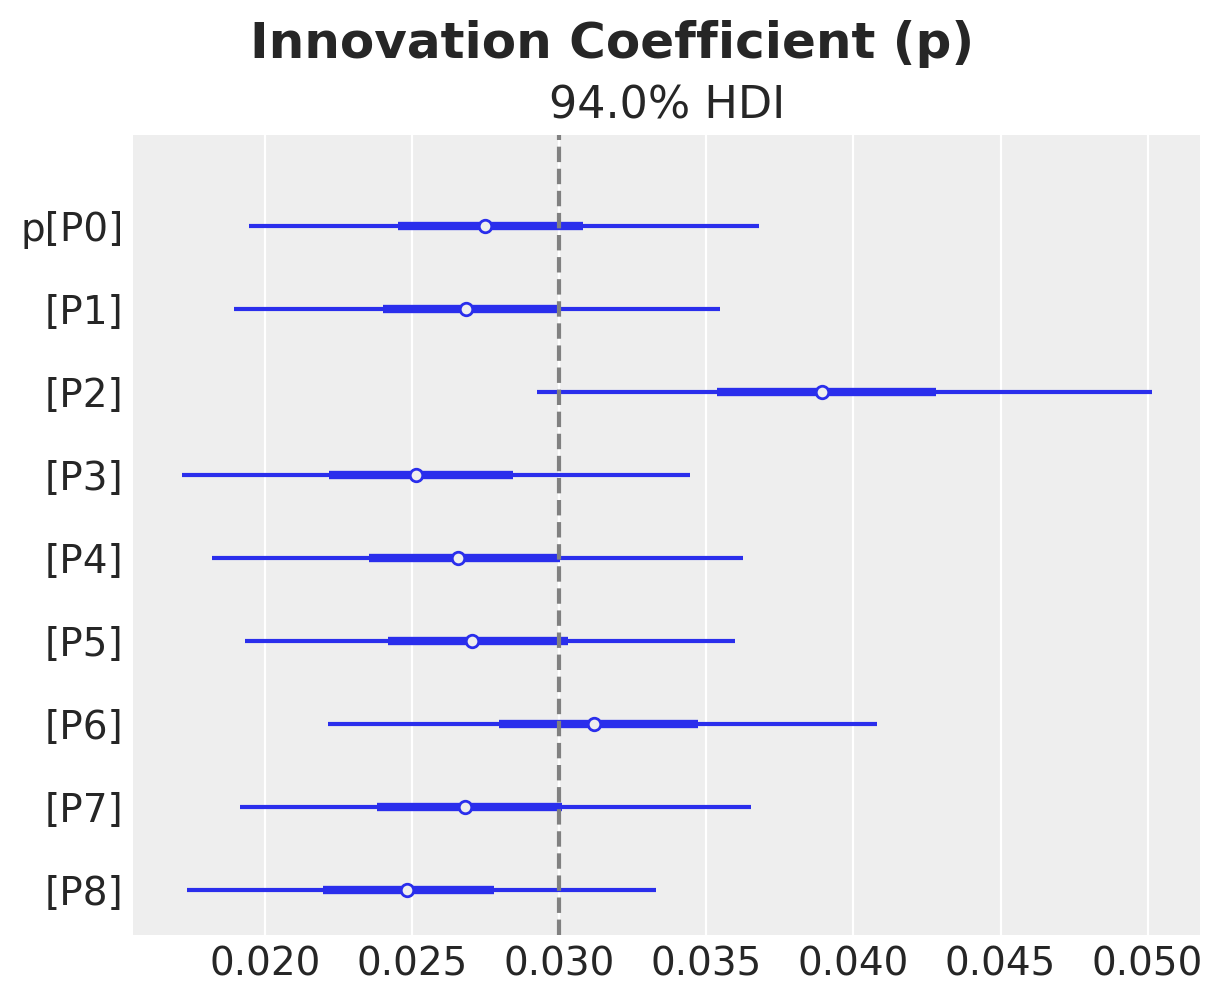

In [15]:
ax, *_ = az.plot_forest(idata["posterior"]["p"], combined=True)
ax.axvline(x=priors["p"].parameters["mu"], color="gray", linestyle="--")
ax.get_figure().suptitle("Innovation Coefficient (p)", fontsize=18, fontweight="bold")

Text(0.5, 0.98, 'Imitation Coefficient (q)')

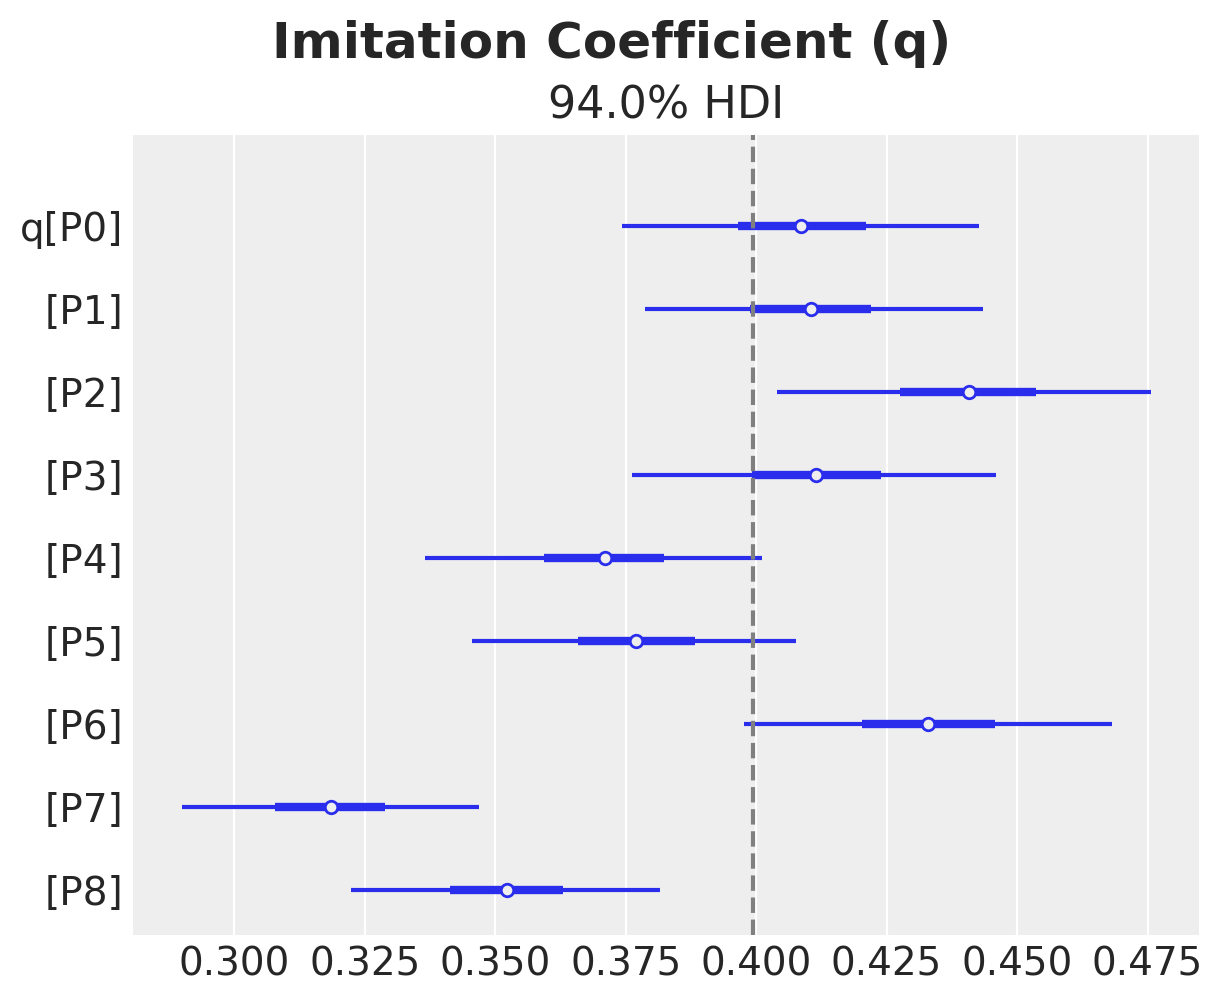

In [16]:
ax, *_ = az.plot_forest(idata["posterior"]["q"], combined=True)
ax.axvline(x=priors["q"].preliz.mean(), color="gray", linestyle="--")
ax.get_figure().suptitle("Imitation Coefficient (q)", fontsize=18, fontweight="bold")

We do see some heterogeneity in the parameters, but overall they are centered around the true values (from the generative model).

## Examining Posterior Predictions for Specific Products

Let's look at the posterior predictive distributions  to see how well our model captures the simulated data.

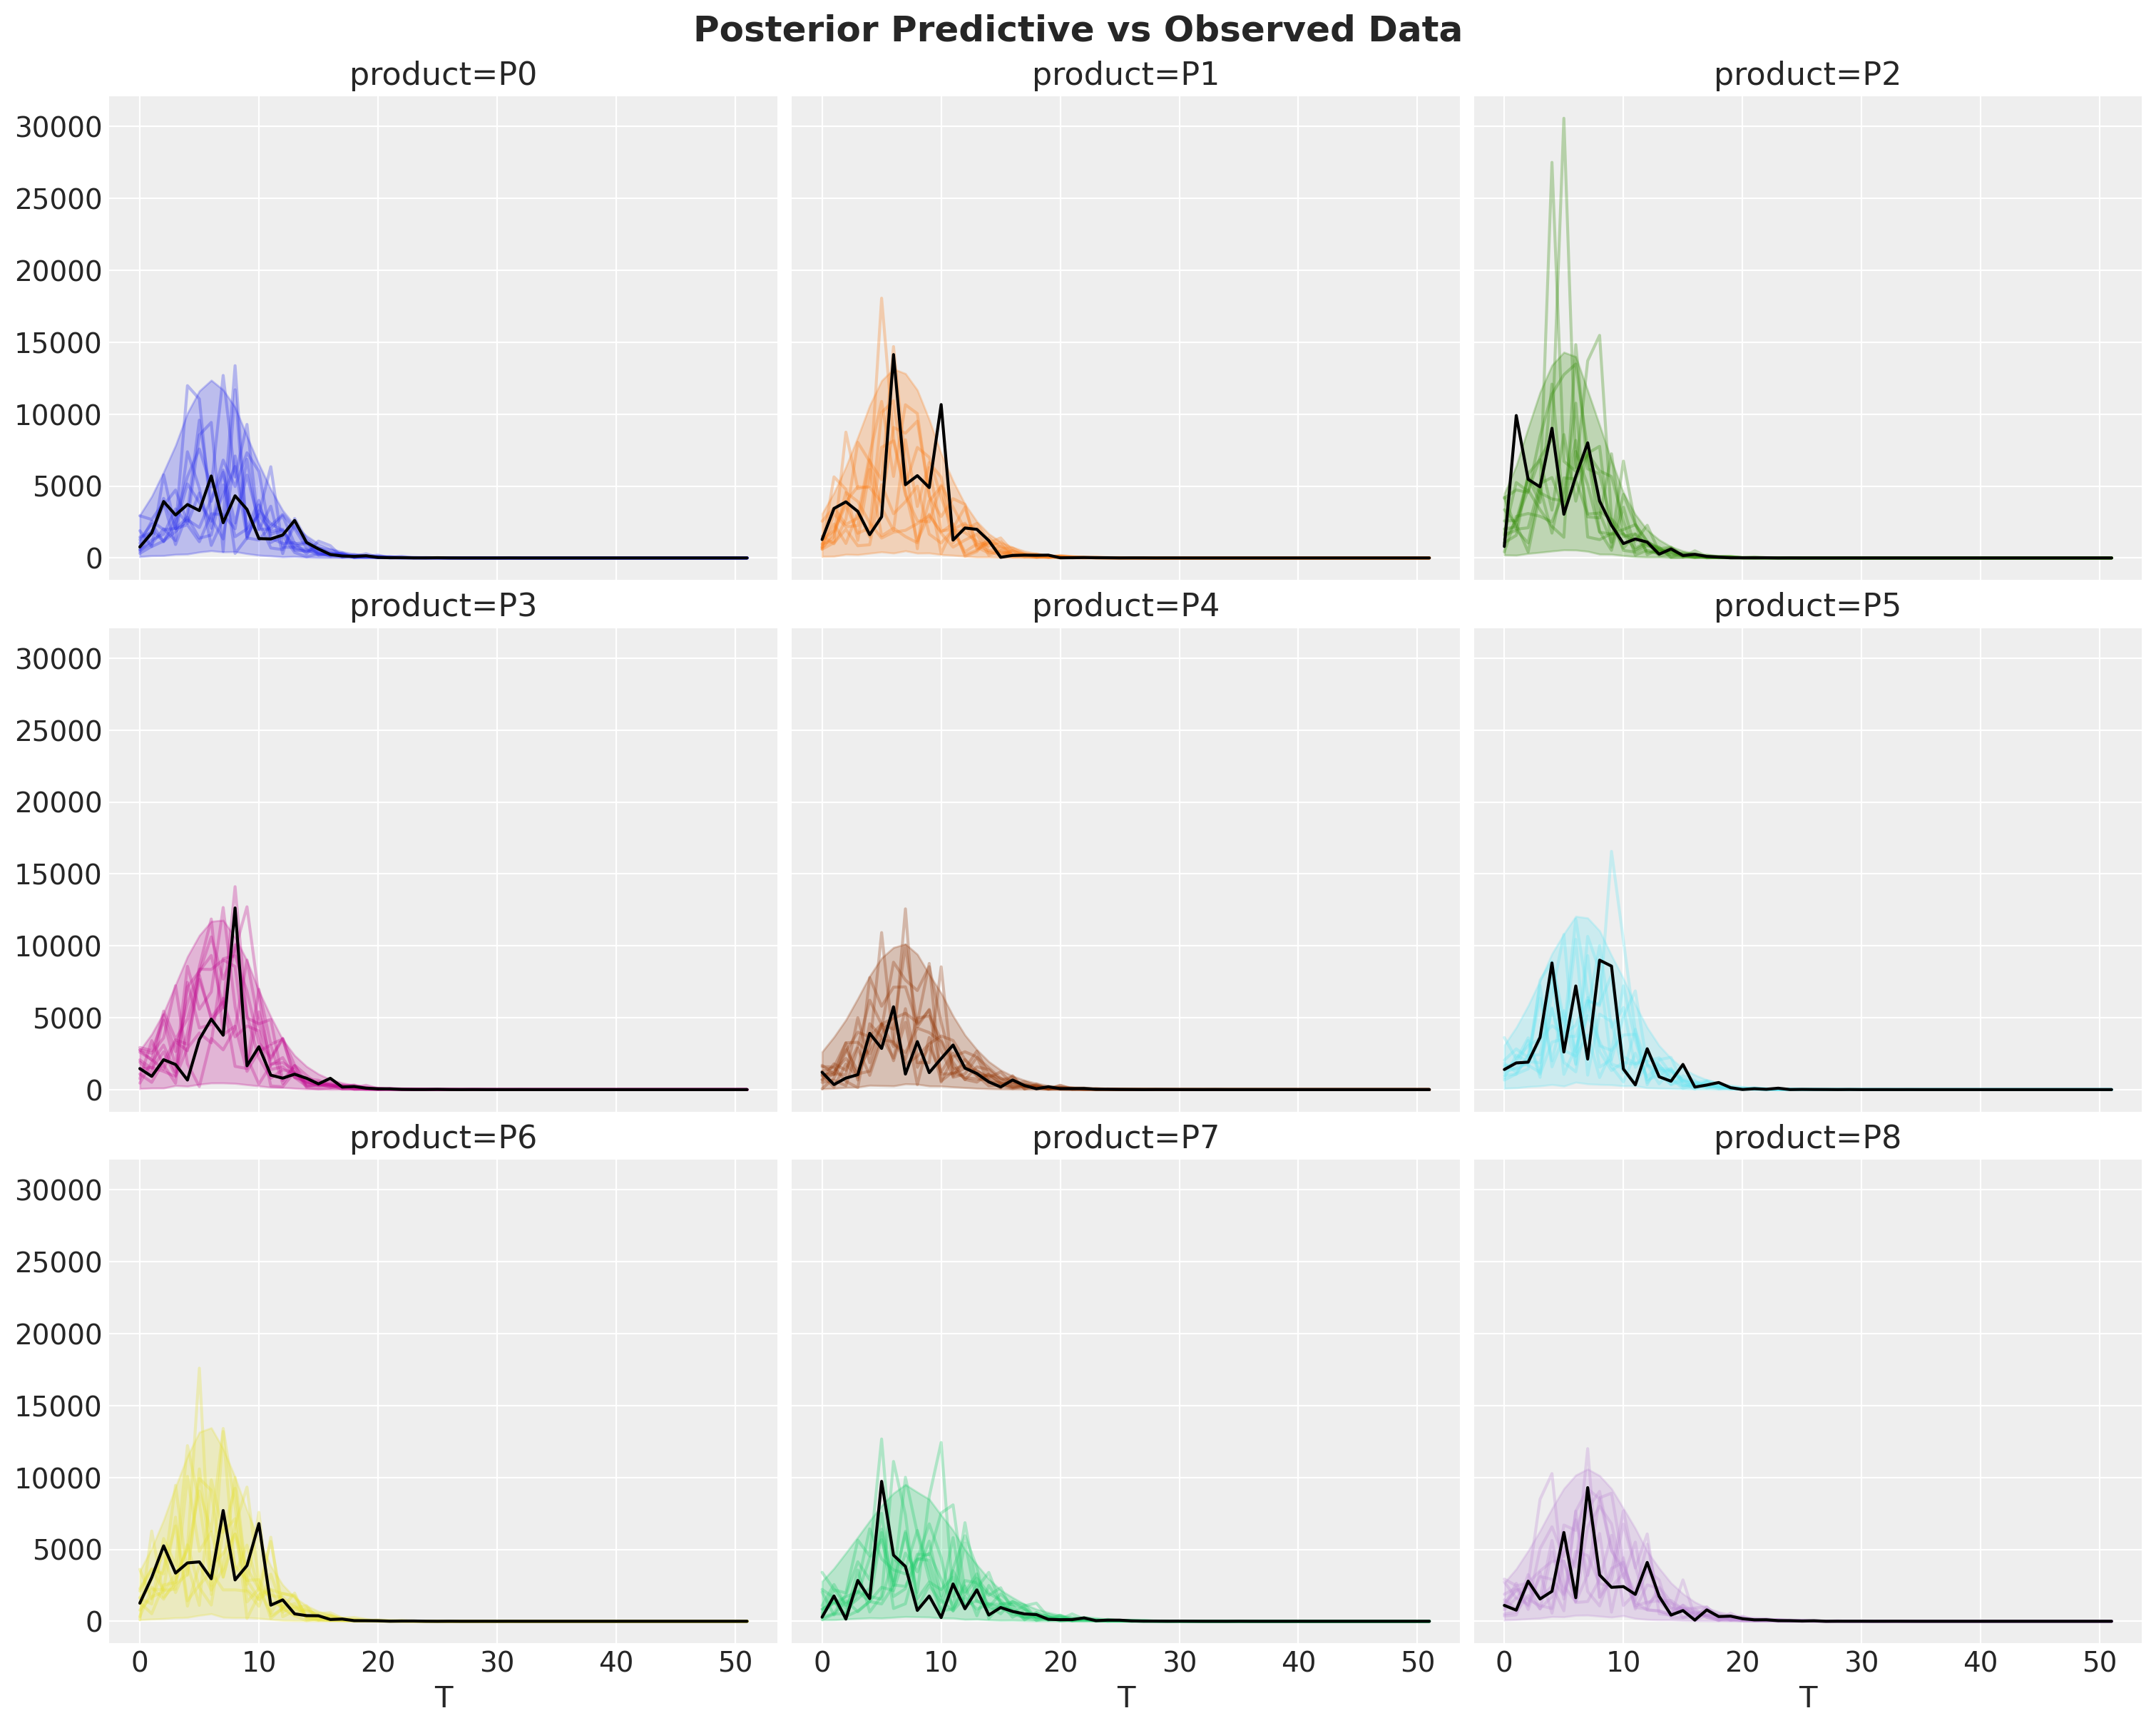

In [17]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior_predictive"]["y"].pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i], color="black")

fig.suptitle("Posterior Predictive vs Observed Data", fontsize=18, fontweight="bold");

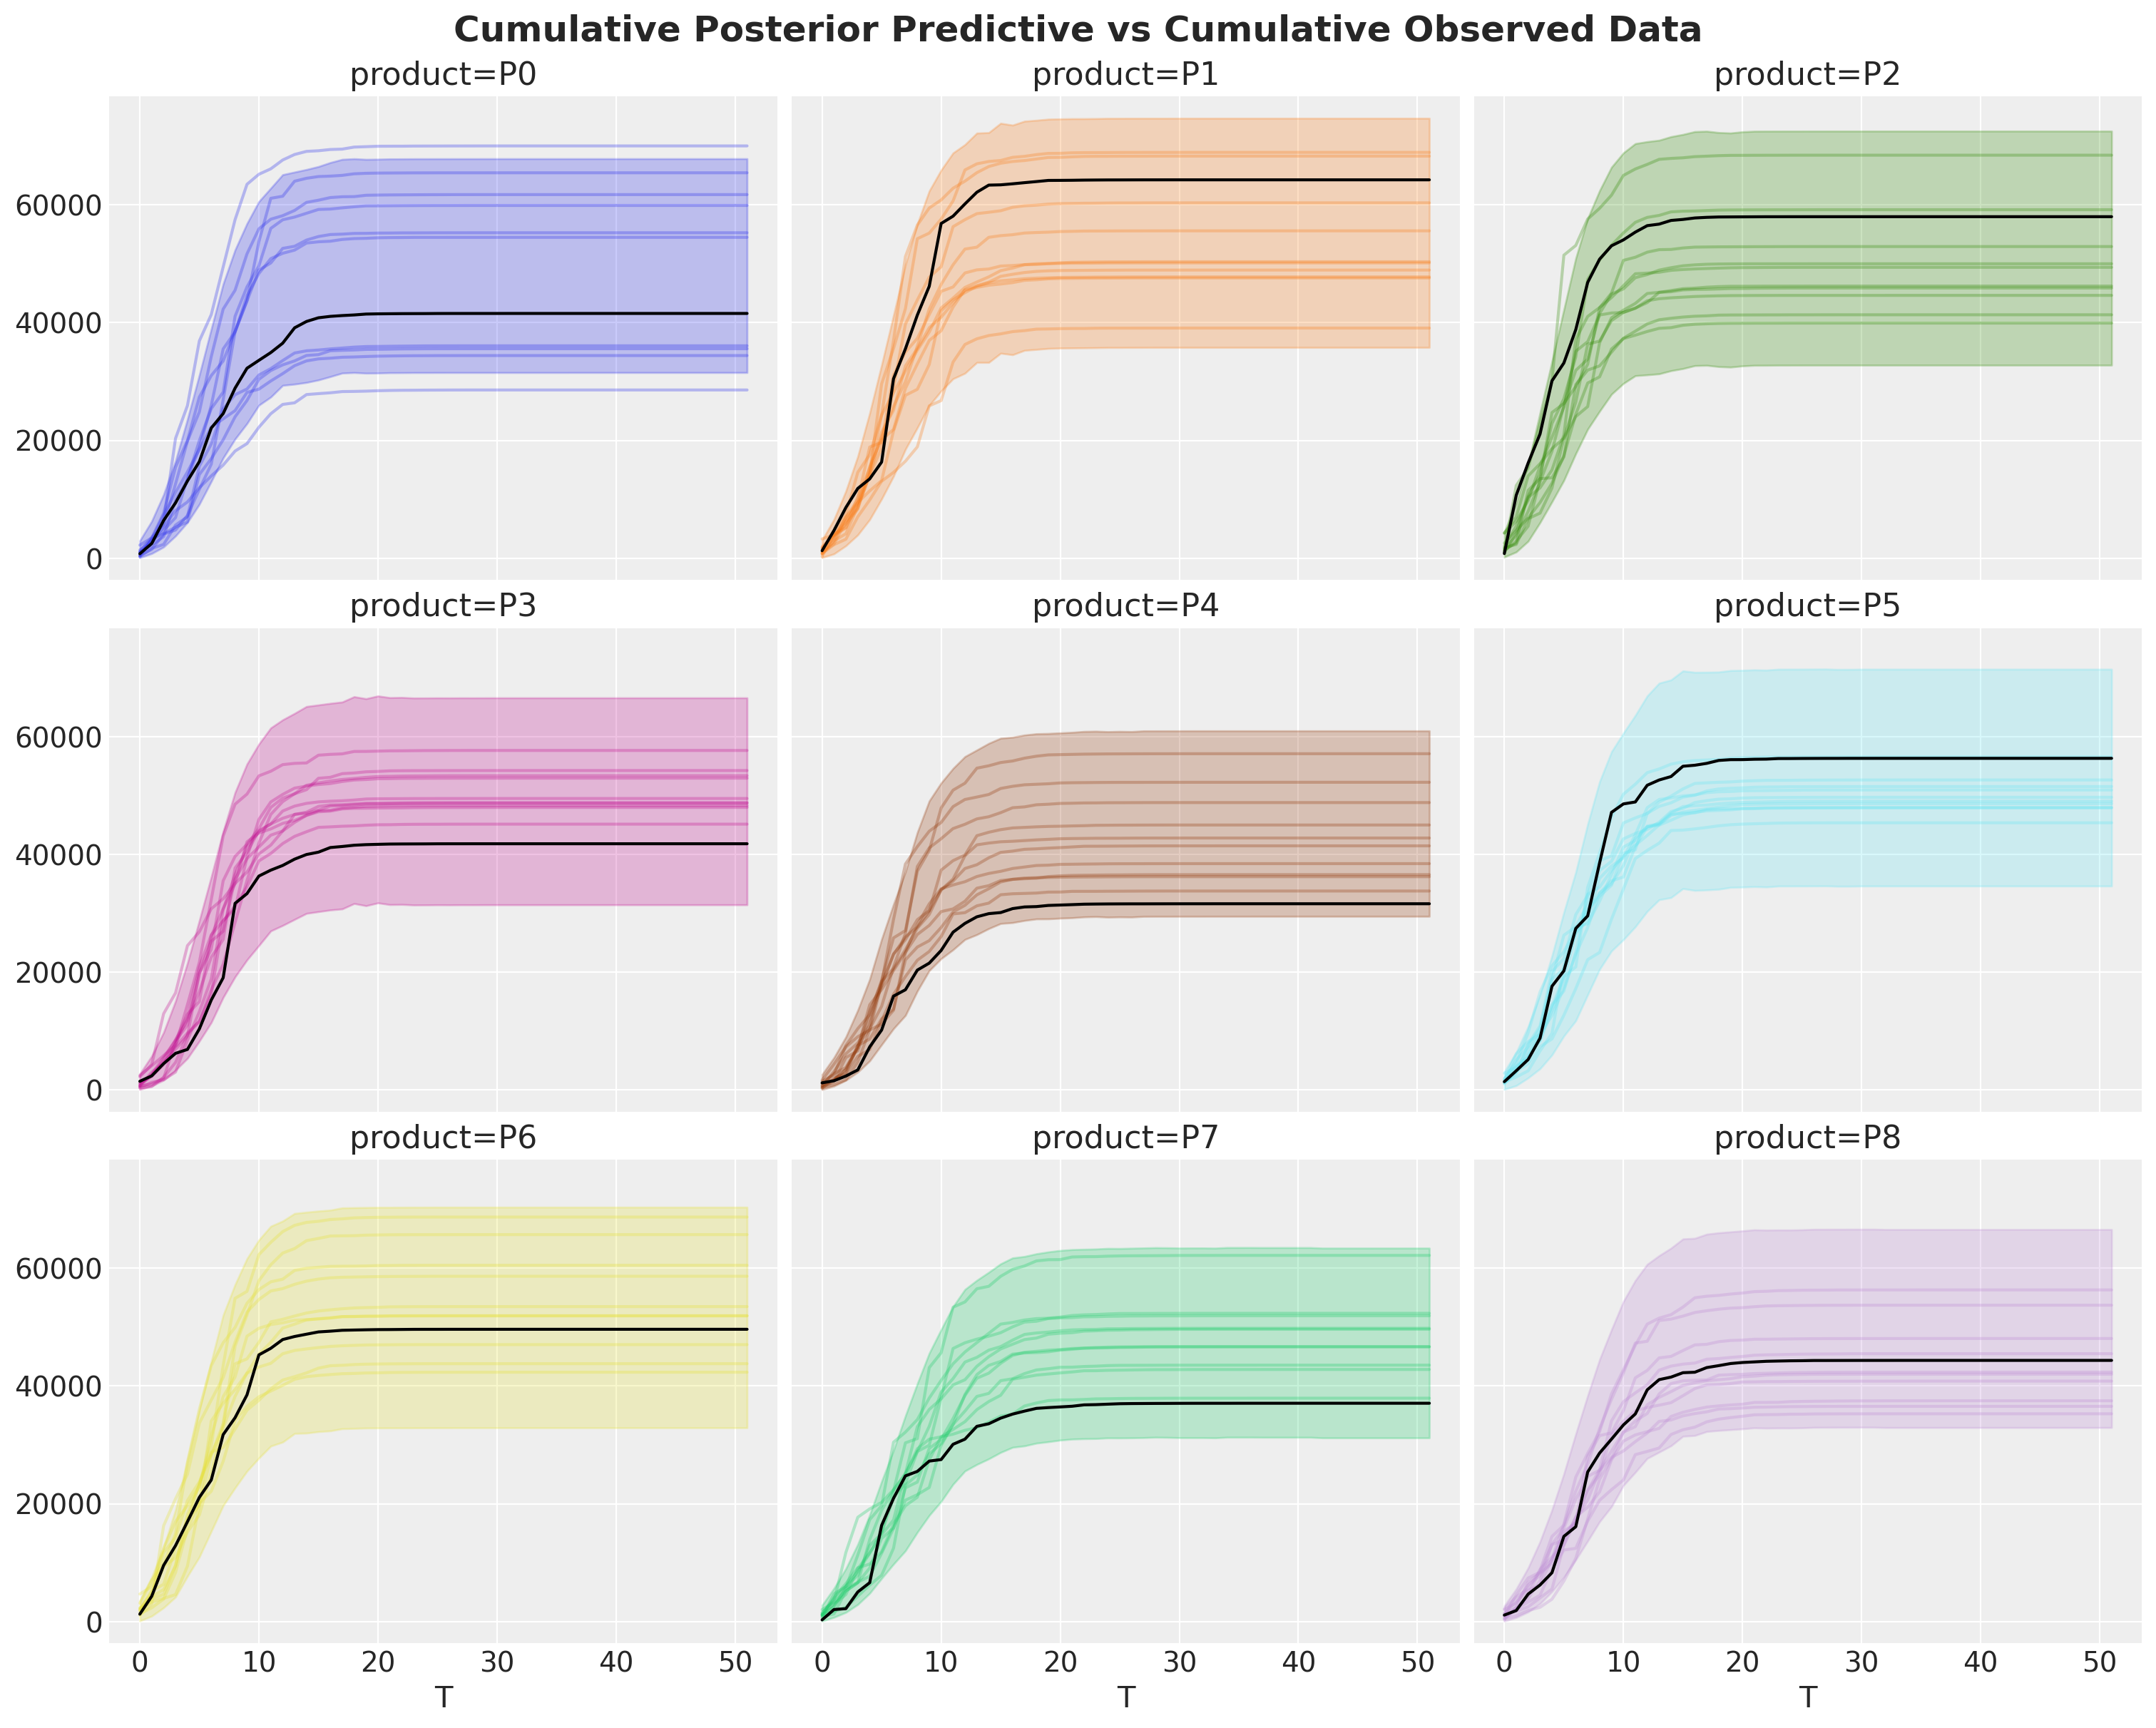

In [18]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior_predictive"]["y"].cumsum(dim="T").pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i].cumsum(), color="black")

fig.suptitle(
    "Cumulative Posterior Predictive vs Cumulative Observed Data",
    fontsize=18,
    fontweight="bold",
);

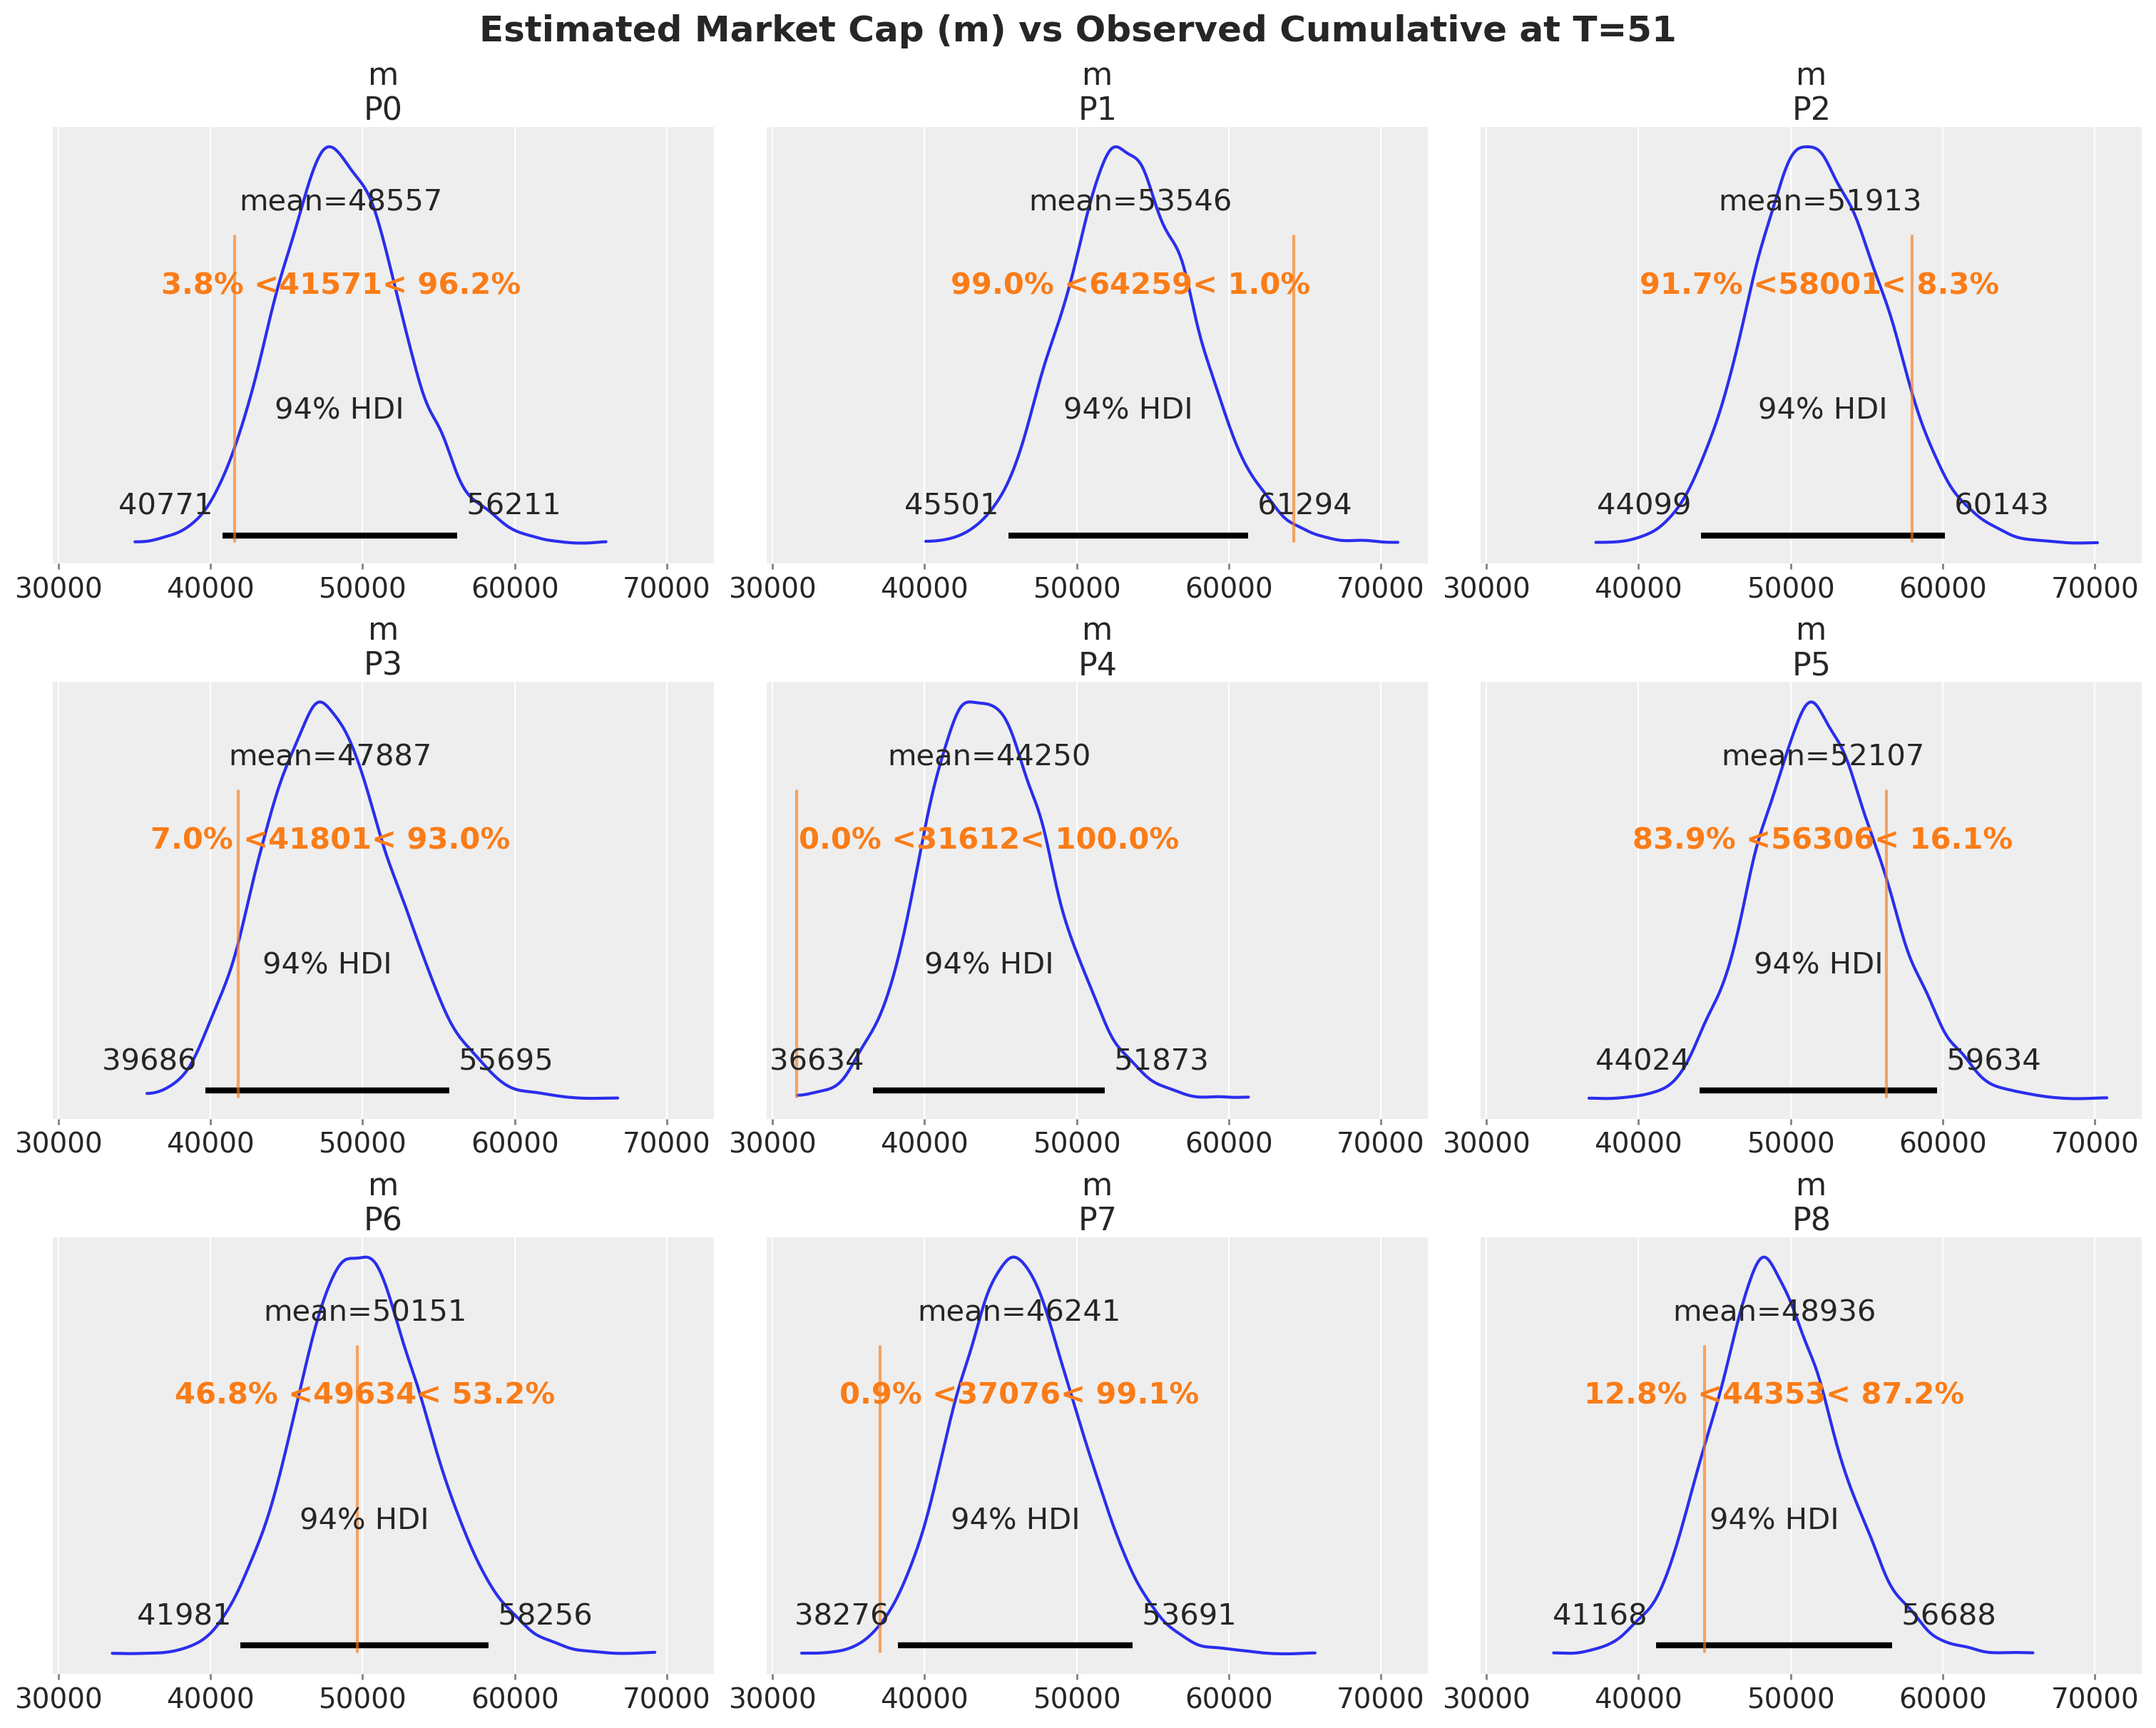

In [19]:
observed_cumulative = bass_data.cumsum(dim="T").isel(T=-1).to_series()

ref_val = {
    "m": [
        {"product": name, "ref_val": value}
        for name, value in observed_cumulative.items()
    ]
}

az.plot_posterior(
    idata.posterior,
    var_names=["m"],
    backend_kwargs=dict(sharex=True, layout="constrained", figsize=(15, 12)),
    ref_val=ref_val,
)

max_T = bass_data.coords["T"].max().item()
fig = plt.gcf()
fig.suptitle(
    f"Estimated Market Cap (m) vs Observed Cumulative at T={max_T}",
    fontsize=18,
    fontweight="bold",
);

Overall, the model does a good job of capturing the data.

Next, we look into the *adopters*, which represent the expected value of the likelihood.

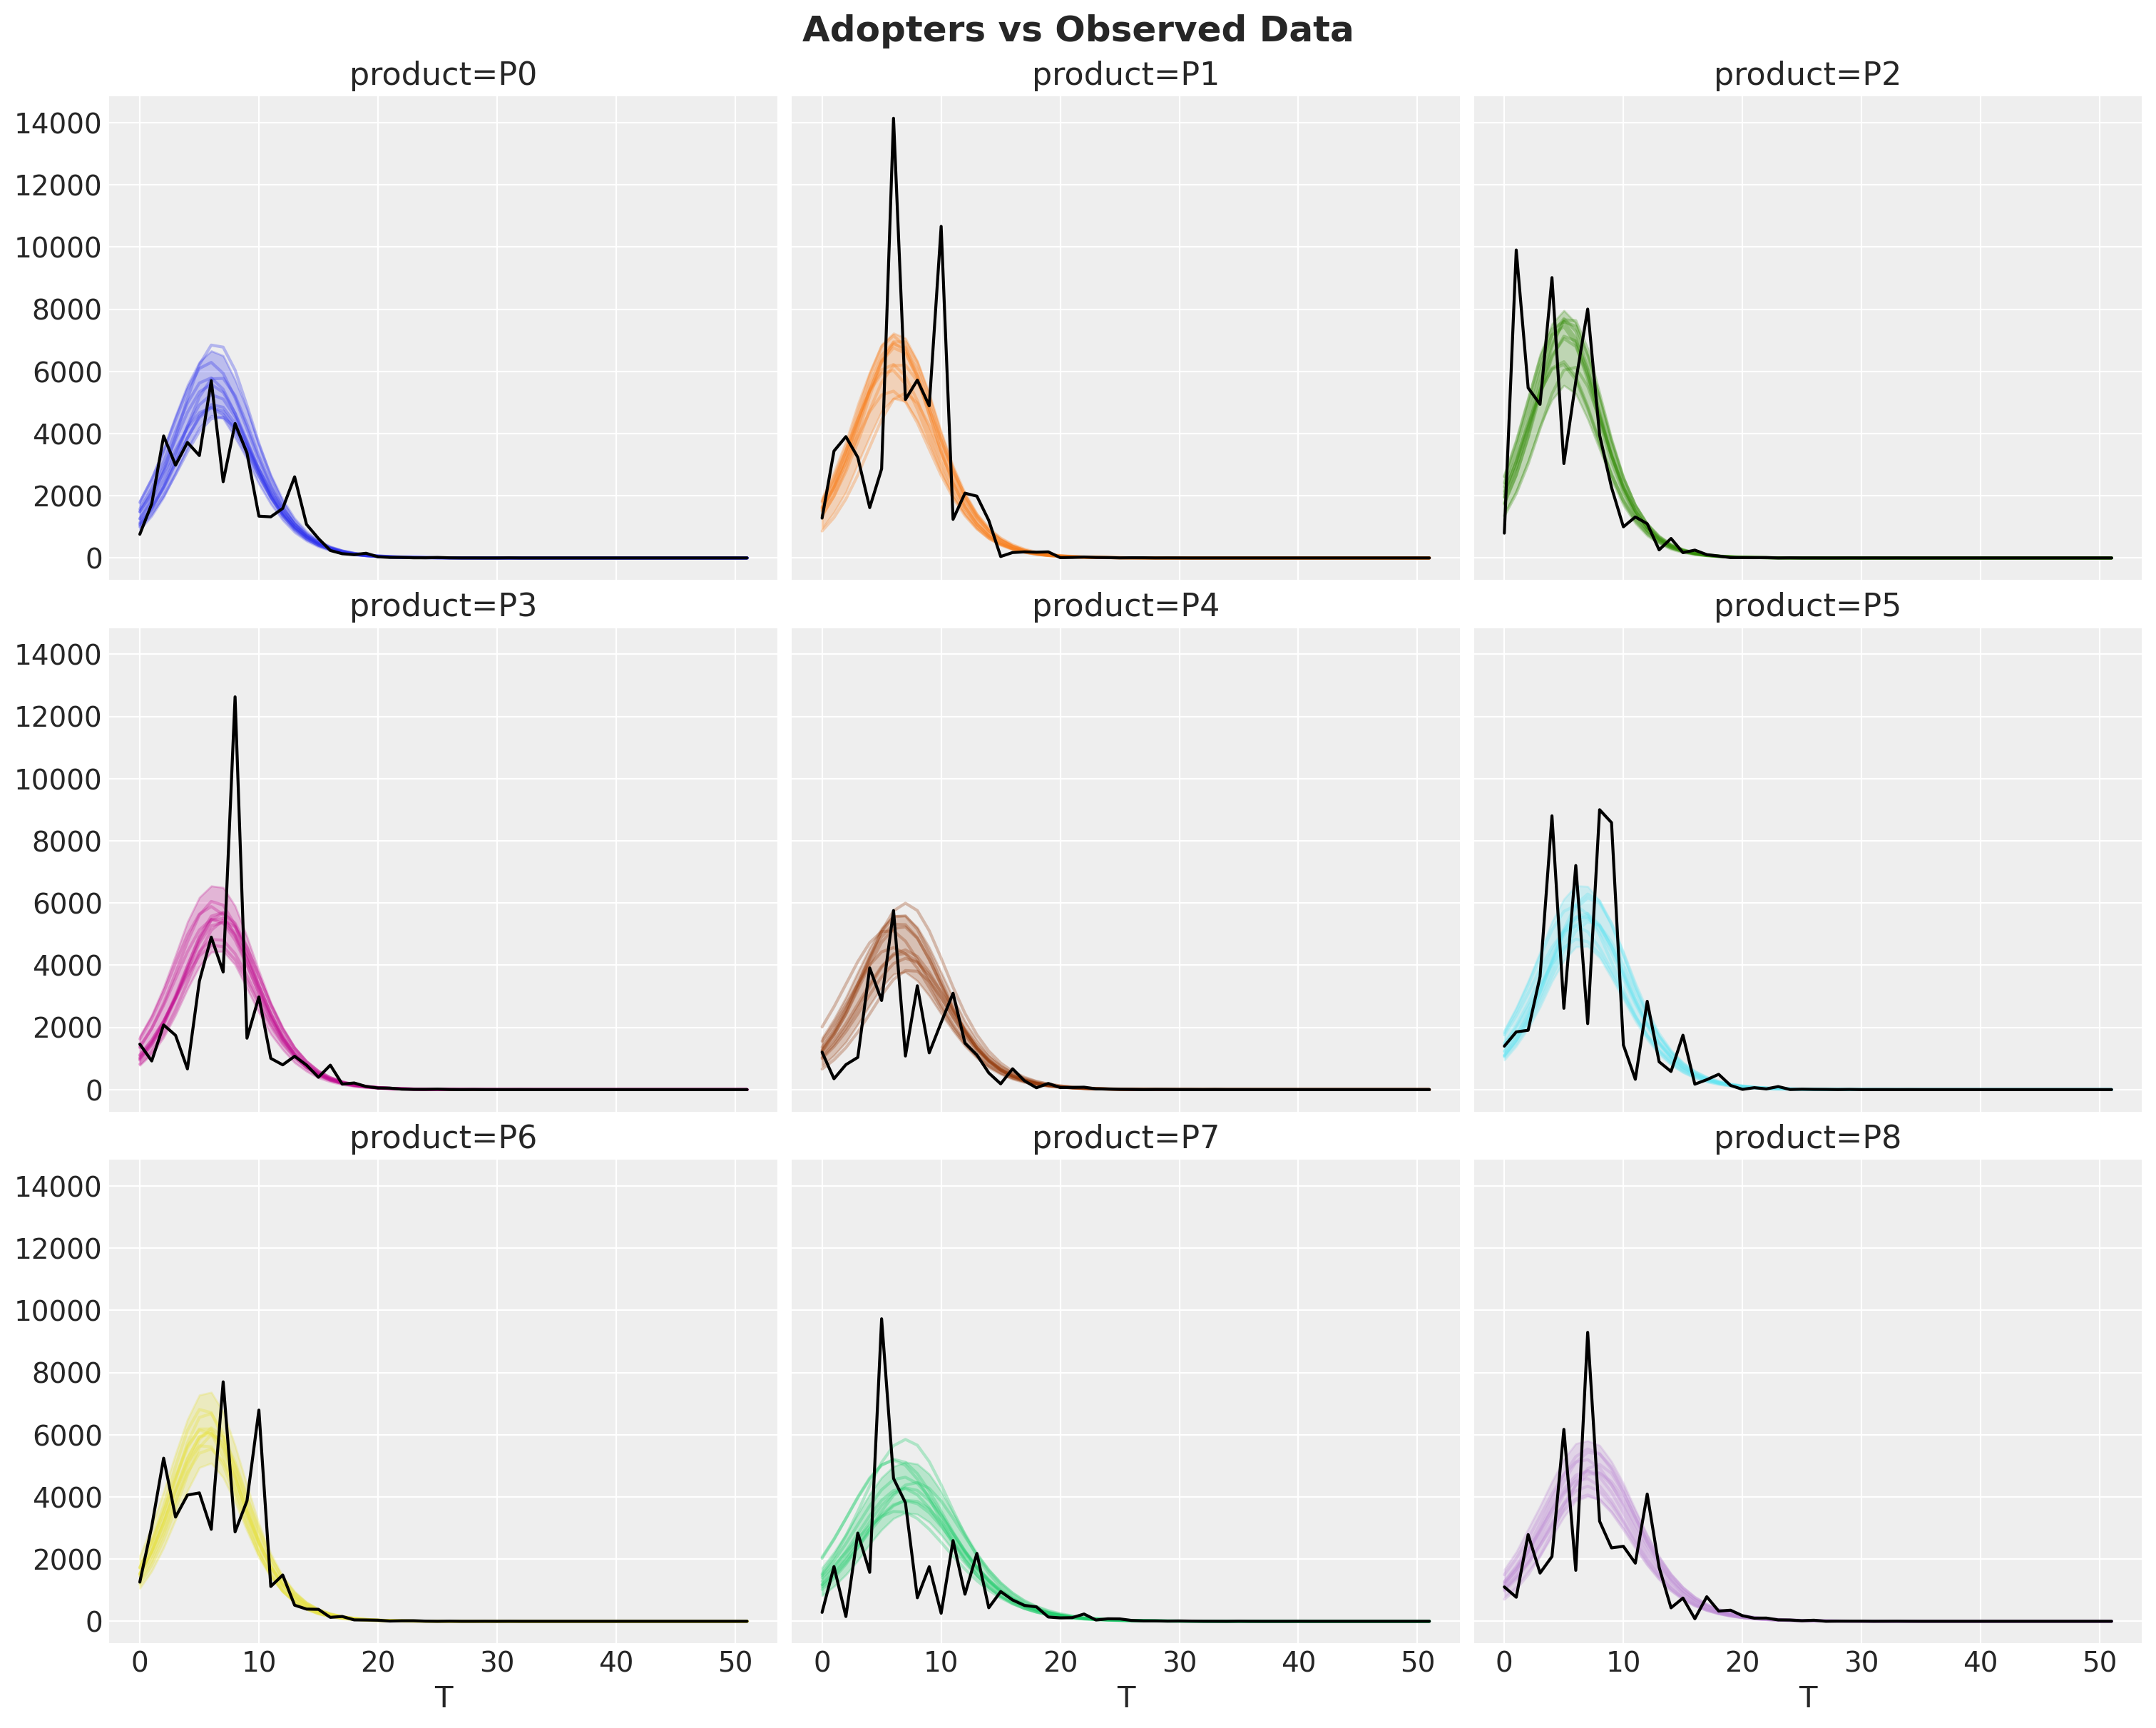

In [20]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior"]["adopters"].pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i], color="black")

fig.suptitle("Adopters vs Observed Data", fontsize=18, fontweight="bold");

This show the fit is indeed quite reasonable.

We can also evaluate the model goodness by looking into the cumulative data:

```{note}
Remember that the adopters is the mean of the distribution so we see some cumulative curves above and some below.

Look at the `idata["posterior_predictive"]["y"]` for the observed data.
```

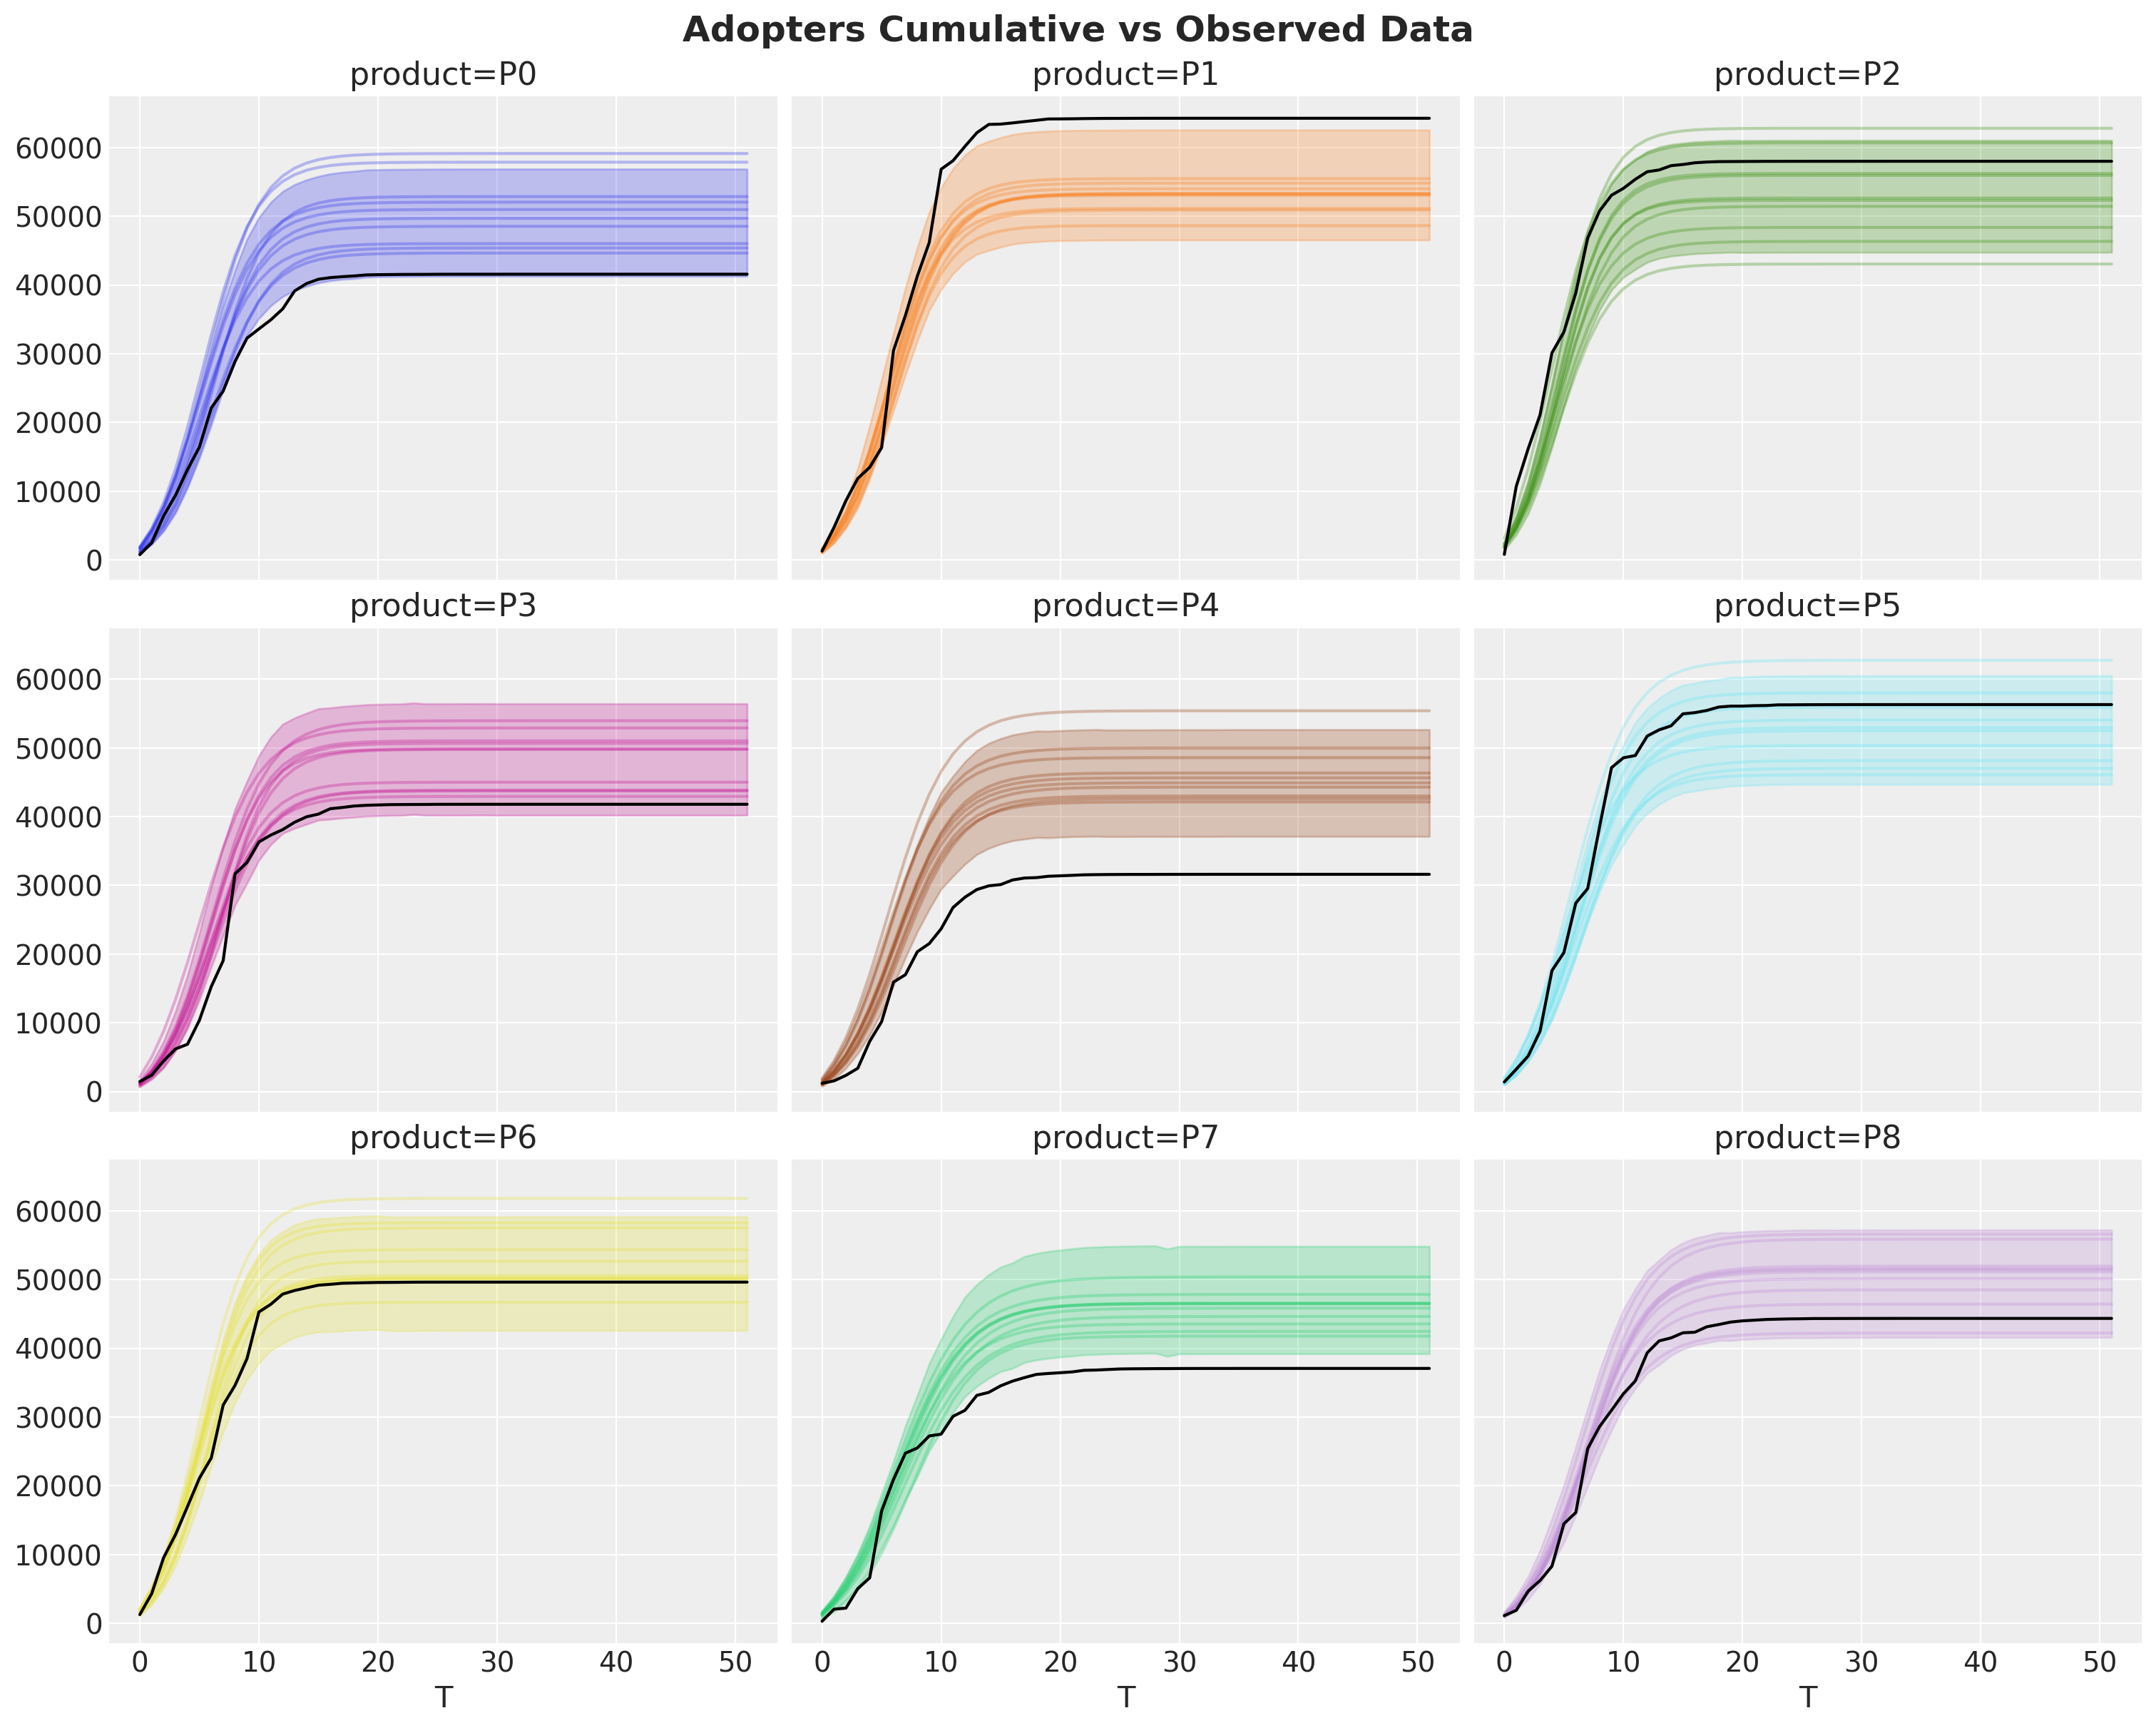

In [21]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior"]["adopters"].cumsum(dim="T").pipe(plot_curve, {"T"}, axes=axes)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i].cumsum(), color="black")

fig.suptitle("Adopters Cumulative vs Observed Data", fontsize=18, fontweight="bold");

We can enhance this view by looking into the components of the model: *innovators* and *imitators* (in orange and green, respectively).

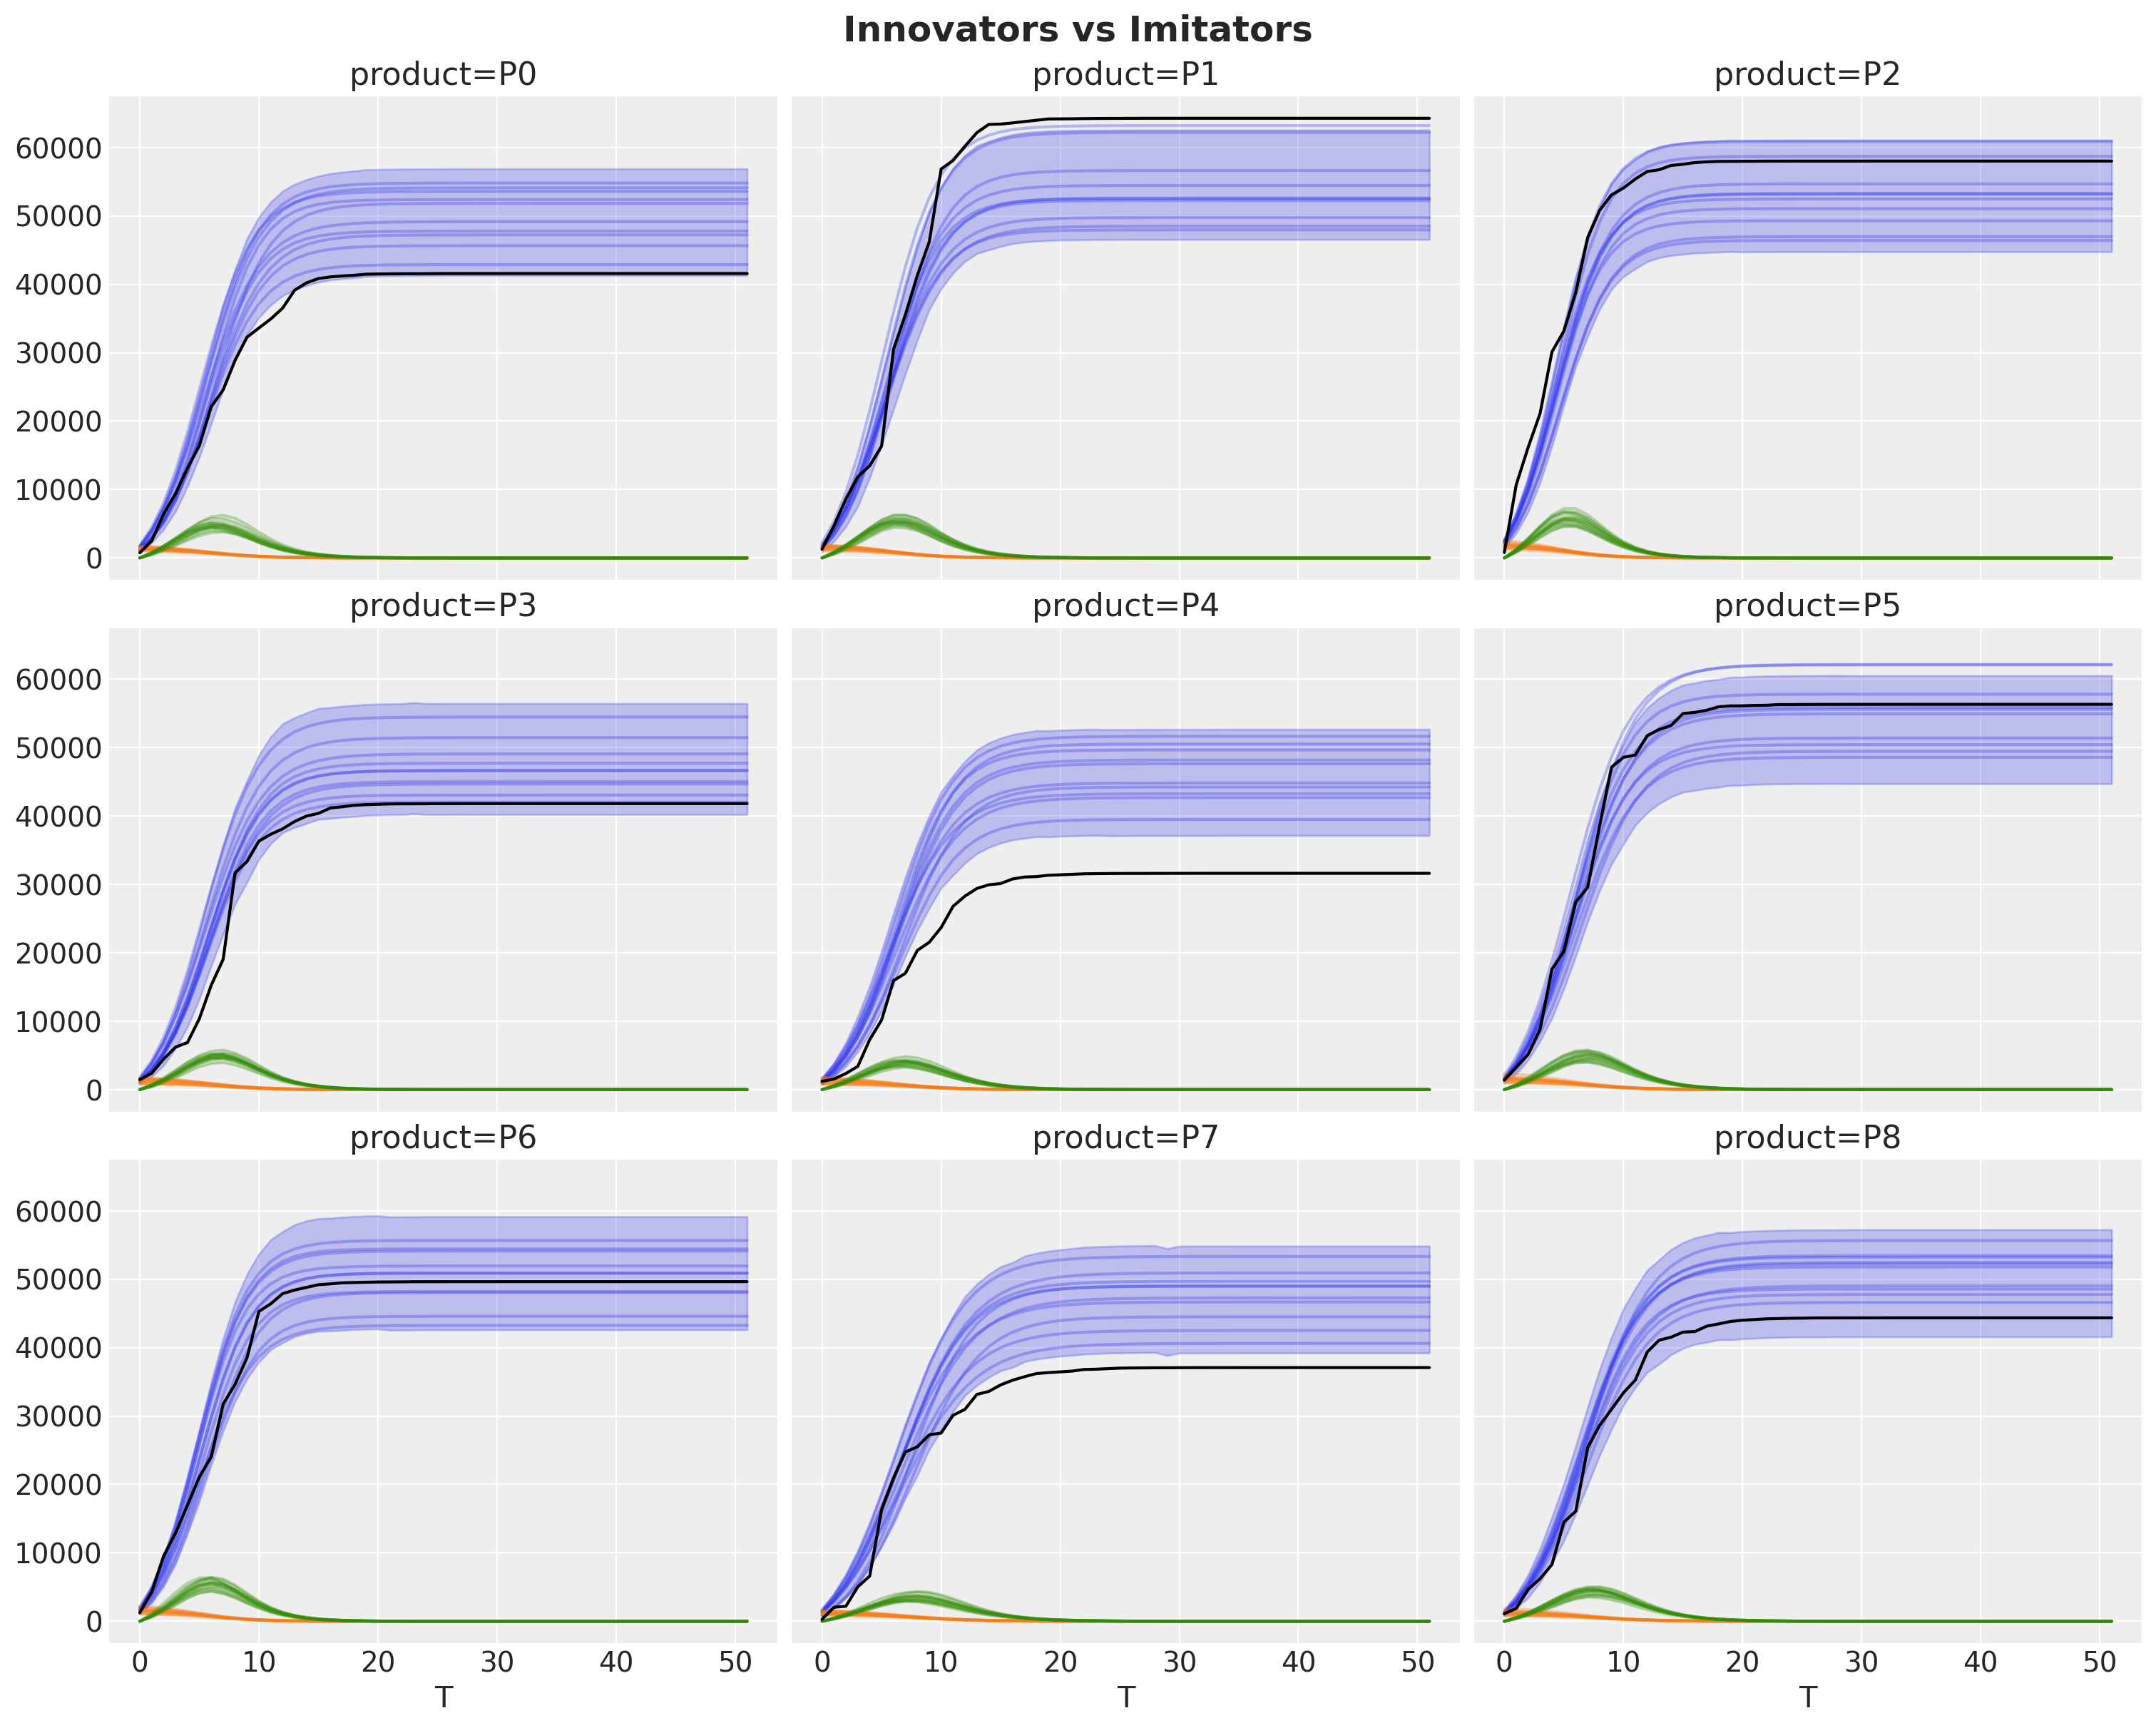

In [22]:
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 12), sharex=True, sharey=True, layout="constrained"
)

idata["posterior"]["adopters"].cumsum(dim="T").pipe(
    plot_curve, {"T"}, colors=3 * 3 * ["C0"], axes=axes
)

idata["posterior"]["innovators"].pipe(
    plot_curve, {"T"}, colors=3 * 3 * ["C1"], axes=axes
)
idata["posterior"]["imitators"].pipe(
    plot_curve, {"T"}, colors=3 * 3 * ["C2"], axes=axes
)

for i, ax in enumerate(axes.flatten()):
    ax.plot(T, bass_data[:, i].cumsum(), color="black")

fig.suptitle("Innovators vs Imitators", fontsize=18, fontweight="bold");

Finally, we can inspect the peak of the adoption curve. 

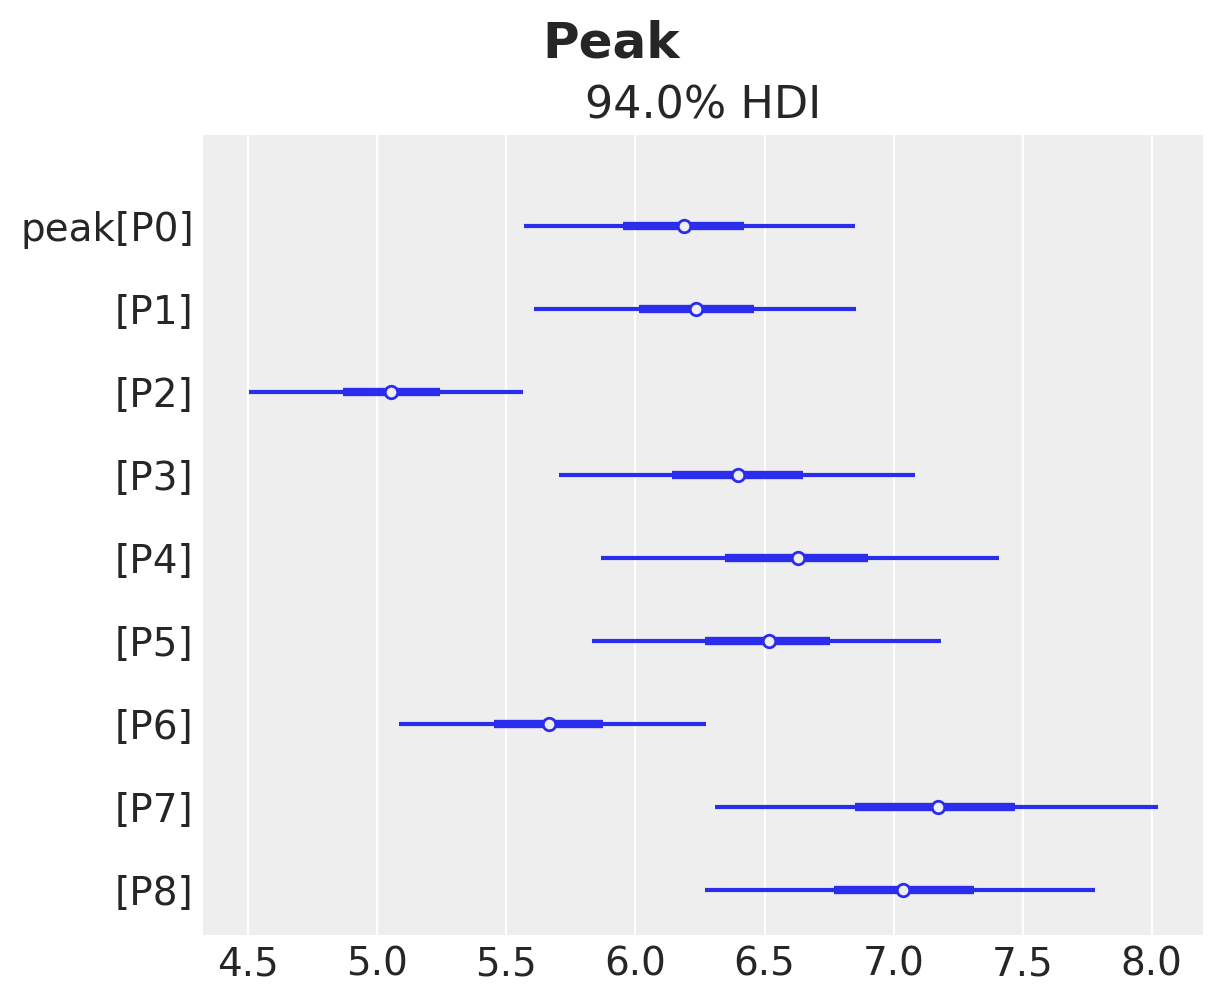

In [23]:
ax, *_ = az.plot_forest(idata["posterior"]["peak"], combined=True)
ax.get_figure().suptitle("Peak", fontsize=18, fontweight="bold");

This fits the observed data quite well. Let's see for example the product `P4`.

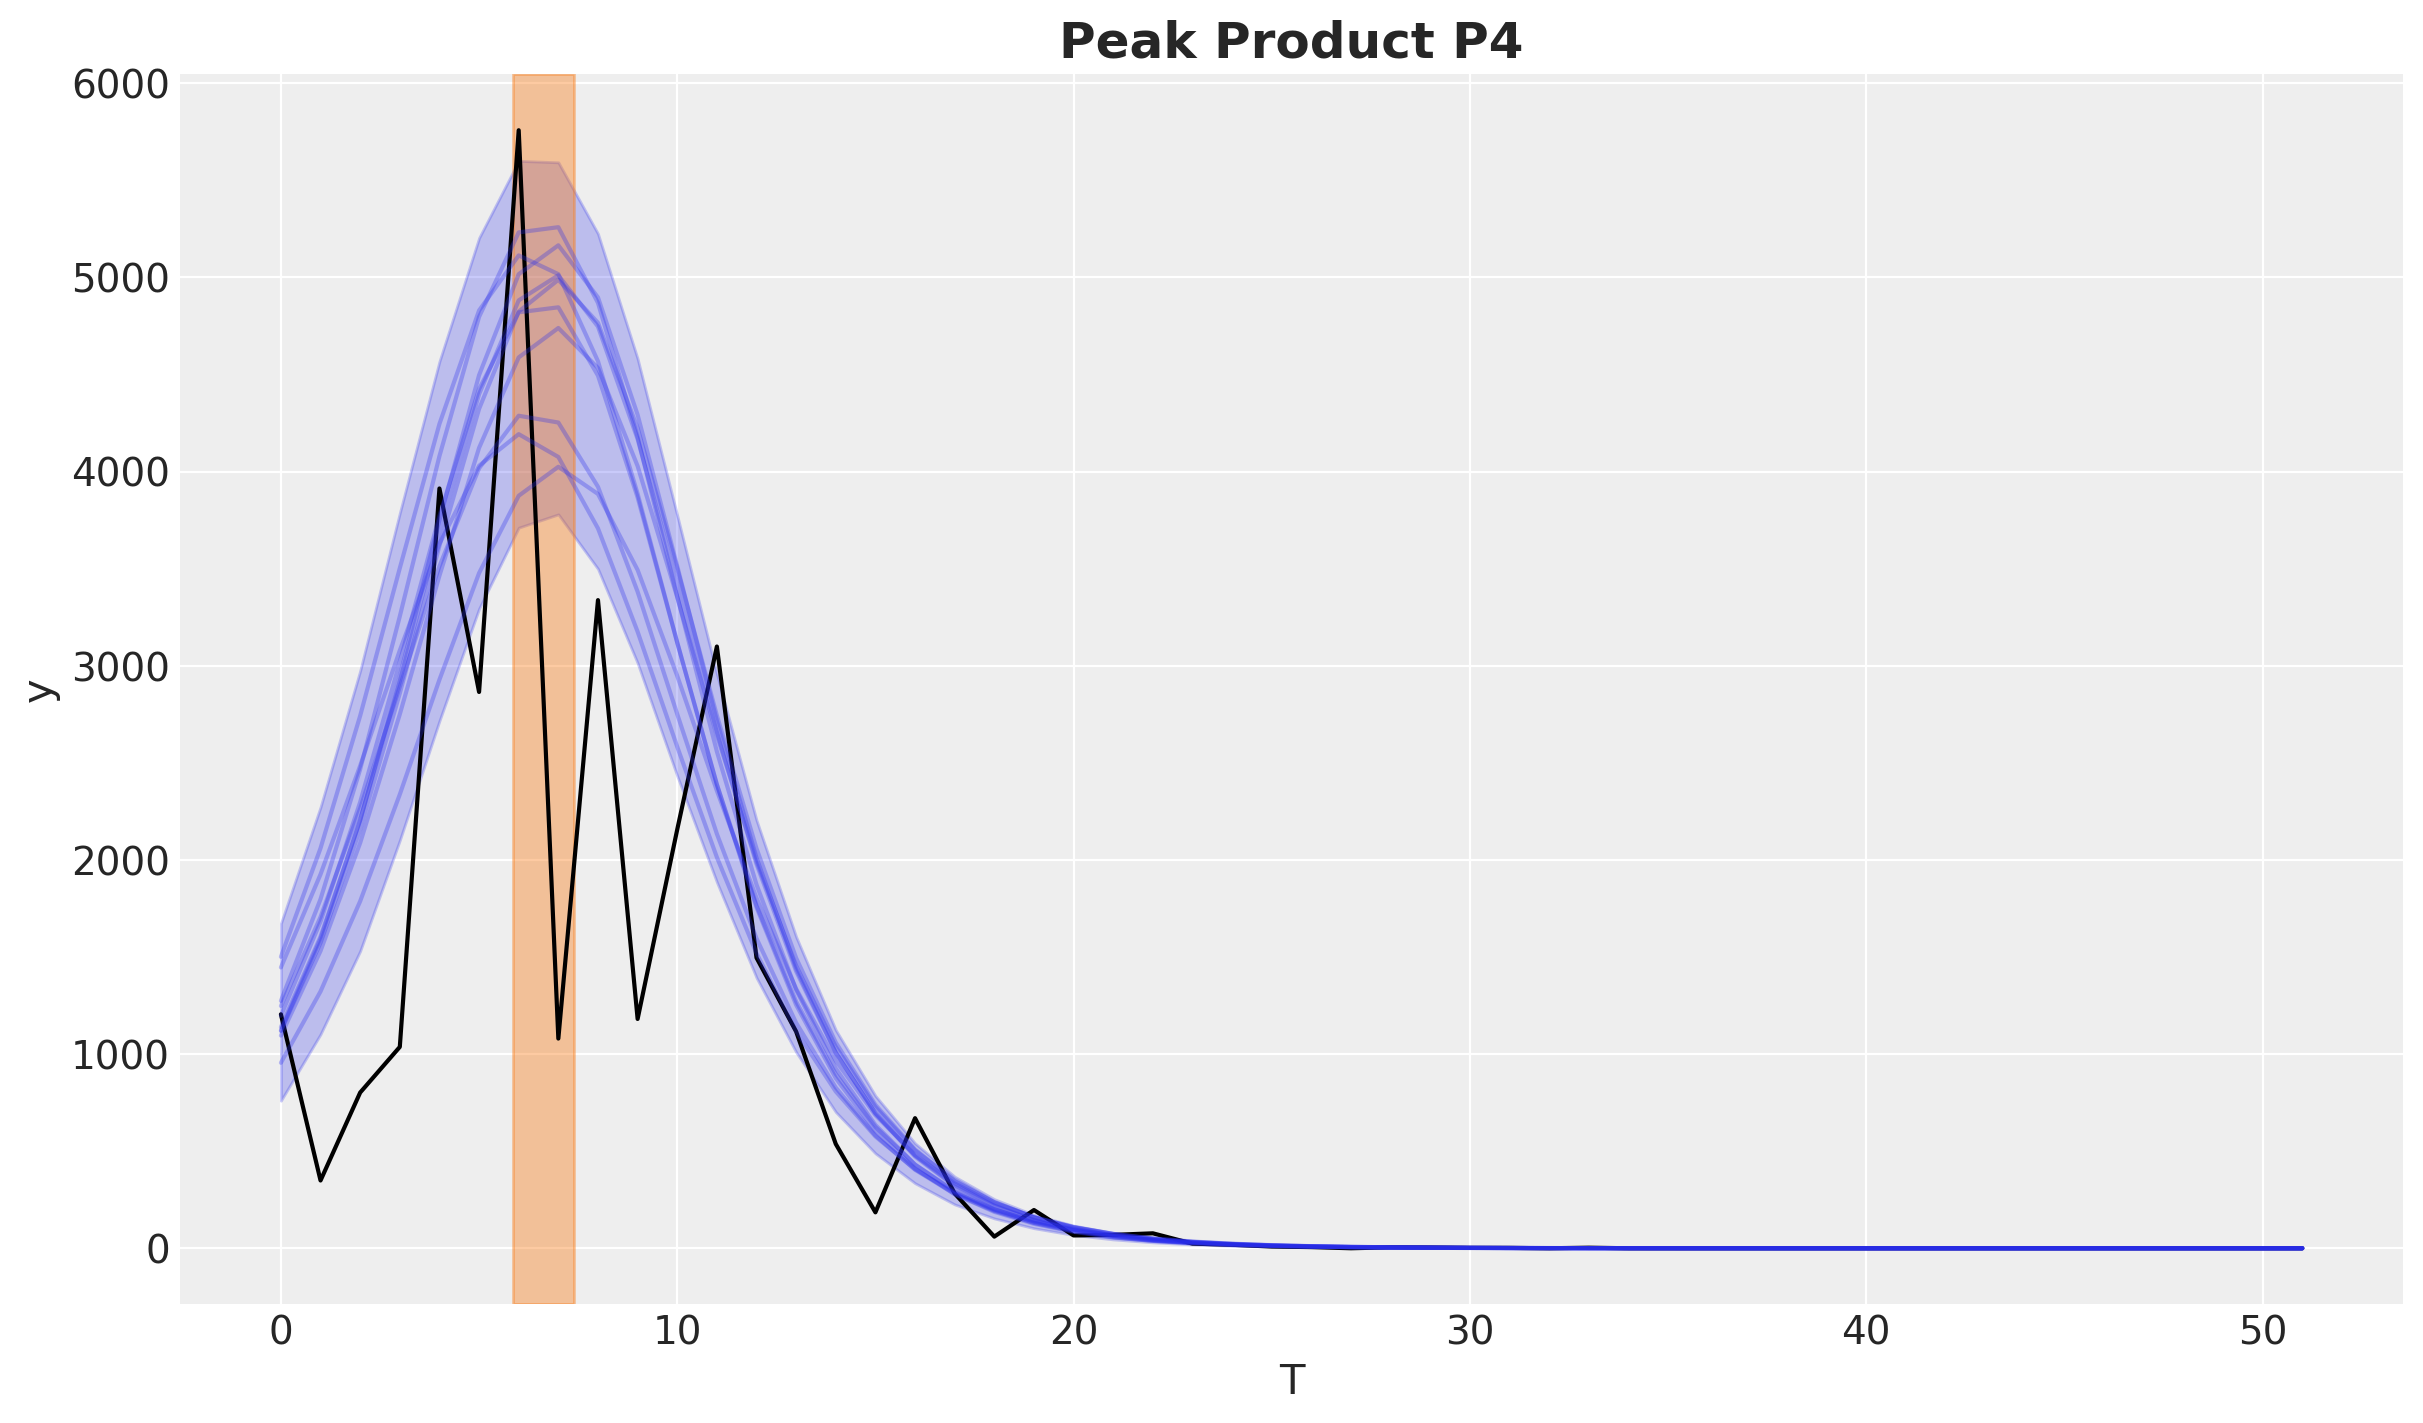

In [24]:
fig, ax = plt.subplots()

product_id = 4

bass_data[:, product_id].plot(ax=ax, color="black")

idata["posterior"]["adopters"].sel(product=f"P{product_id}").pipe(
    plot_curve, {"T"}, axes=ax
)

peak_hdi = az.hdi(idata["posterior"]["peak"].sel(product=f"P{product_id}"))["peak"]
ax.axvspan(
    peak_hdi.sel(hdi="lower").item(),
    peak_hdi.sel(hdi="higher").item(),
    color="C1",
    alpha=0.4,
)

ax.set_title(f"Peak Product {products[product_id]}", fontsize=18, fontweight="bold");

In [25]:
%load_ext watermark
%watermark -n -u -v -iv -w -p nutpie,pymc_marketing,pytensor

Last updated: Thu Jul 24 2025

Python implementation: CPython
Python version       : 3.11.13
IPython version      : 9.3.0

nutpie        : 0.15.1
pymc_marketing: 0.15.1
pytensor      : 2.31.7

numpy         : 2.2.6
pandas        : 2.3.0
arviz         : 0.21.0
xarray        : 2025.6.1
pymc_marketing: 0.15.1
matplotlib    : 3.10.3
pymc          : 5.24.0

Watermark: 2.5.0

